In [1]:
"""
- correct participant grouping
- no DWT utilization for artifact removal
- rolling window
- (band power of participants x channels)
- five participants per group
-   The jupyter script is used to carry out the analysis of group runs
-   This is an ETL process: extract (from database), transform (preprocessing techniques), load (numPy arrays)
-   The average of all scans in music therapy group and control group was used to develop the spectograms
-   Statistical analysis:  rolling window used 
"""

'\n- correct participant grouping\n- no DWT utilization for artifact removal\n- rolling window\n- (band power of participants x channels)\n- five participants per group\n-   The jupyter script is used to carry out the analysis of group runs\n-   This is an ETL process: extract (from database), transform (preprocessing techniques), load (numPy arrays)\n-   The average of all scans in music therapy group and control group was used to develop the spectograms\n-   Statistical analysis:  rolling window used \n'

In [2]:
from helper import*
import params as cfg

In [3]:
def zipExtract(filenames,localDirectory,destDirectory,variableName,sFreq,data_collection_time,sampling_state):
    #print("\n")
    #print("zip files in "+ variableName+":")
    def zipExt(filename,localDirectory,destDirectory,variableName):
        zf = ZipFile(localDirectory+filename, 'r')
        path = destDirectory+variableName
        zf.extractall(path)
        zf.close()
    zipOutputs = []
    for filename in filenames:
        zipOutputs.append(zipExt(filename,localDirectory,destDirectory,variableName))
        #print(filename)
    files_dest = next(walk(destDirectory+variableName), (None, None, []))[2]
    files_dest = [f for f in files_dest if f.endswith('.csv')]
    resampled_data = []
    resampled_time = []
    for I in range(len(files_dest)):
        resampled_data.append(singleTransformToRawEEG((pd.read_csv(destDirectory+variableName+'/'+files_dest[I]))[['RAW_TP9','RAW_AF7','RAW_AF8','RAW_TP10']],sFreq,data_collection_time,sampling_state)[0])
        resampled_time.append(singleTransformToRawEEG((pd.read_csv(destDirectory+variableName+'/'+files_dest[I]))[['RAW_TP9','RAW_AF7','RAW_AF8','RAW_TP10']],sFreq,data_collection_time,sampling_state)[1])
    resampled_data = np.array(resampled_data)
    resampled_time = np.array(resampled_time)
    #print("\n")
    #print(variableName + " zip files contents:")
    #print(files_dest)
    return files_dest,resampled_data,resampled_time

def avgBandPower(data,fs,low,high):
    #  Inputs  :   data    - 2D numpy array (d0 = samples, d1 = channels) of filtered EEG data
    #              or data - 3D numpy array (d0 = channels, d1 = no of windows, d2 = length of windows) of unfiltered EEG data
    #              fs      - sampling rate of hardware (defaults to config)
    #              low     - lower limit in Hz for the brain wave
    #              high    - upper limit in Hz for the brain wave
    #              win     - size of window to be used for sliding
    #   Output  :   3D array (columns of array,no of windows,window size)
    def absPower(data,fs,low,high): 
        win = 4*fs                                                
        freqs, psd = signal.welch(data,fs,nperseg=win)
        idx_freqBands = np.logical_and(freqs >= low, freqs <= high) 
        freq_res = freqs[1] - freqs[0]                                  
        freqBand_power = simps(psd[idx_freqBands],dx=freq_res)  
        return freqBand_power
    avg_BandPower = []
    for i in range(len(data.T)):
        avg_BandPower.append(absPower(data[:,i],fs,low,high))
    avg_BandPower= np.array(avg_BandPower).T
    return avg_BandPower


In [4]:
# group-task-time
M11 = [['m11_1.zip'],['m11_2.zip'],['m11_3.zip'],['m11_4.zip'],['m11_5.zip']]
M21 = [['m21_1.zip'],['m21_2.zip'],['m21_3.zip'],['m21_4.zip'],['m21_5.zip']]
M12 = [['m12_1.zip'],['m12_2.zip'],['m12_3.zip'],['m12_4.zip'],['m12_5.zip']]
M22 = [['m22_1.zip'],['m22_2.zip'],['m22_3.zip'],['m22_4.zip'],['m22_5.zip']]
C11 = [['c11_1.zip'],['c11_2.zip'],['c11_3.zip'],['c11_4.zip'],['c11_5.zip']]
C21 = [['c21_1.zip'],['c21_2.zip'],['c21_3.zip'],['c21_4.zip'],['c21_5.zip']]
C12 = [['c12_1.zip'],['c12_2.zip'],['c12_3.zip'],['c12_4.zip'],['c12_5.zip']]
C22 = [['c22_1.zip'],['c22_2.zip'],['c22_3.zip'],['c22_4.zip'],['c22_5.zip']]
localDir = "/Users/joshuaighalo/Downloads/Mind_Monitor-2/"
destDir = "/Users/joshuaighalo/Downloads/Mind_Monitor-2/dest/"
os.system('rm -rf %s/*' % destDir)
fs_setting = 'constant'

In [5]:
M11_1 = zipExtract(M11[0],localDir,destDir,"M11_1",cfg.fs,cfg.collection_time,cfg.fs_setting)[1]
M11_1 = M11_1.reshape(M11_1.shape[1],M11_1.shape[2])
M11_2 = zipExtract(M11[1],localDir,destDir,"M11_2",cfg.fs,cfg.collection_time,cfg.fs_setting)[1]
M11_2 = M11_2.reshape(M11_2.shape[1],M11_2.shape[2])
M11_3 = zipExtract(M11[2],localDir,destDir,"M11_3",cfg.fs,cfg.collection_time,cfg.fs_setting)[1]
M11_3 = M11_3.reshape(M11_3.shape[1],M11_3.shape[2])
M11_4 = zipExtract(M11[3],localDir,destDir,"M11_4",cfg.fs,cfg.collection_time,cfg.fs_setting)[1]
M11_4 = M11_4.reshape(M11_4.shape[1],M11_4.shape[2])
M11_5 = zipExtract(M11[4],localDir,destDir,"M11_5",cfg.fs,cfg.collection_time,cfg.fs_setting)[1]
M11_5 = M11_5.reshape(M11_5.shape[1],M11_5.shape[2])

M21_1 = zipExtract(M21[0],localDir,destDir,"M21_1",cfg.fs,cfg.collection_time,cfg.fs_setting)[1]
M21_1 = M21_1.reshape(M21_1.shape[1],M21_1.shape[2])
M21_2 = zipExtract(M21[1],localDir,destDir,"M21_2",cfg.fs,cfg.collection_time,cfg.fs_setting)[1]
M21_2 = M21_2.reshape(M21_2.shape[1],M21_2.shape[2])
M21_3 = zipExtract(M21[2],localDir,destDir,"M21_3",cfg.fs,cfg.collection_time,cfg.fs_setting)[1]
M21_3 = M21_3.reshape(M21_3.shape[1],M21_3.shape[2])
M21_4 = zipExtract(M21[3],localDir,destDir,"M21_4",cfg.fs,cfg.collection_time,cfg.fs_setting)[1]
M21_4 = M21_4.reshape(M21_4.shape[1],M21_4.shape[2])
M21_5 = zipExtract(M21[4],localDir,destDir,"M21_5",cfg.fs,cfg.collection_time,cfg.fs_setting)[1]
M21_5 = M21_5.reshape(M21_5.shape[1],M21_5.shape[2])

M12_1 = zipExtract(M12[0],localDir,destDir,"M12_1",cfg.fs,cfg.collection_time,cfg.fs_setting)[1]
M12_1 = M12_1.reshape(M12_1.shape[1],M12_1.shape[2])
M12_2 = zipExtract(M12[1],localDir,destDir,"M12_2",cfg.fs,cfg.collection_time,cfg.fs_setting)[1]
M12_2 = M12_2.reshape(M12_2.shape[1],M12_2.shape[2])
M12_3 = zipExtract(M12[2],localDir,destDir,"M12_3",cfg.fs,cfg.collection_time,cfg.fs_setting)[1]
M12_3 = M12_3.reshape(M12_3.shape[1],M12_3.shape[2])
M12_4 = zipExtract(M12[3],localDir,destDir,"M12_4",cfg.fs,cfg.collection_time,cfg.fs_setting)[1]
M12_4 = M12_4.reshape(M12_4.shape[1],M12_4.shape[2])
M12_5 = zipExtract(M12[4],localDir,destDir,"M12_5",cfg.fs,cfg.collection_time,cfg.fs_setting)[1]
M12_5 = M12_5.reshape(M12_5.shape[1],M12_5.shape[2])

M22_1 = zipExtract(M22[0],localDir,destDir,"M22_1",cfg.fs,cfg.collection_time,cfg.fs_setting)[1]
M22_1 = M22_1.reshape(M22_1.shape[1],M22_1.shape[2])
M22_2 = zipExtract(M22[1],localDir,destDir,"M22_2",cfg.fs,cfg.collection_time,cfg.fs_setting)[1]
M22_2 = M22_2.reshape(M22_2.shape[1],M22_2.shape[2])
M22_3 = zipExtract(M22[2],localDir,destDir,"M22_3",cfg.fs,cfg.collection_time,cfg.fs_setting)[1]
M22_3 = M22_3.reshape(M22_3.shape[1],M22_3.shape[2])
M22_4 = zipExtract(M22[3],localDir,destDir,"M22_4",cfg.fs,cfg.collection_time,cfg.fs_setting)[1]
M22_4 = M22_4.reshape(M22_4.shape[1],M22_4.shape[2])
M22_5 = zipExtract(M22[4],localDir,destDir,"M22_5",cfg.fs,cfg.collection_time,cfg.fs_setting)[1]
M22_5 = M22_5.reshape(M22_5.shape[1],M22_5.shape[2])

C11_1 = zipExtract(C11[0],localDir,destDir,"C11_1",cfg.fs,cfg.collection_time,cfg.fs_setting)[1]
C11_1 = C11_1.reshape(C11_1.shape[1],C11_1.shape[2])
C11_2 = zipExtract(C11[1],localDir,destDir,"C11_2",cfg.fs,cfg.collection_time,cfg.fs_setting)[1]
C11_2 = C11_2.reshape(C11_2.shape[1],C11_2.shape[2])
C11_3 = zipExtract(C11[2],localDir,destDir,"C11_3",cfg.fs,cfg.collection_time,cfg.fs_setting)[1]
C11_3 = C11_3.reshape(C11_3.shape[1],C11_3.shape[2])
C11_4 = zipExtract(C11[3],localDir,destDir,"C11_4",cfg.fs,cfg.collection_time,cfg.fs_setting)[1]
C11_4 = C11_4.reshape(C11_4.shape[1],C11_4.shape[2])
C11_5 = zipExtract(C11[4],localDir,destDir,"C11_5",cfg.fs,cfg.collection_time,cfg.fs_setting)[1]
C11_5 = C11_5.reshape(C11_5.shape[1],C11_5.shape[2])

C21_1 = zipExtract(C21[0],localDir,destDir,"C21_1",cfg.fs,cfg.collection_time,cfg.fs_setting)[1]
C21_1 = C21_1.reshape(C21_1.shape[1],C21_1.shape[2])
C21_2 = zipExtract(C21[1],localDir,destDir,"C21_2",cfg.fs,cfg.collection_time,cfg.fs_setting)[1]
C21_2 = C21_2.reshape(C21_2.shape[1],C21_2.shape[2])
C21_3 = zipExtract(C21[2],localDir,destDir,"C21_3",cfg.fs,cfg.collection_time,cfg.fs_setting)[1]
C21_3 = C21_3.reshape(C21_3.shape[1],C21_3.shape[2])
C21_4 = zipExtract(C21[3],localDir,destDir,"C21_4",cfg.fs,cfg.collection_time,cfg.fs_setting)[1]
C21_4 = C21_4.reshape(C21_4.shape[1],C21_4.shape[2])
C21_5 = zipExtract(C21[4],localDir,destDir,"C21_5",cfg.fs,cfg.collection_time,cfg.fs_setting)[1]
C21_5 = C21_5.reshape(C21_5.shape[1],C21_5.shape[2])

C12_1 = zipExtract(C12[0],localDir,destDir,"C12_1",cfg.fs,cfg.collection_time,cfg.fs_setting)[1]
C12_1 = C12_1.reshape(C12_1.shape[1],C12_1.shape[2])
C12_2 = zipExtract(C12[1],localDir,destDir,"C12_2",cfg.fs,cfg.collection_time,cfg.fs_setting)[1]
C12_2 = C12_2.reshape(C12_2.shape[1],C12_2.shape[2])
C12_3 = zipExtract(C12[2],localDir,destDir,"C12_3",cfg.fs,cfg.collection_time,cfg.fs_setting)[1]
C12_3 = C12_3.reshape(C12_3.shape[1],C12_3.shape[2])
C12_4 = zipExtract(C12[3],localDir,destDir,"C12_4",cfg.fs,cfg.collection_time,cfg.fs_setting)[1]
C12_4 = C12_4.reshape(C12_4.shape[1],C12_4.shape[2])
C12_5 = zipExtract(C12[4],localDir,destDir,"C12_5",cfg.fs,cfg.collection_time,cfg.fs_setting)[1]
C12_5 = C12_5.reshape(C12_5.shape[1],C12_5.shape[2])


C22_1 = zipExtract(C22[0],localDir,destDir,"C22_1",cfg.fs,cfg.collection_time,cfg.fs_setting)[1]
C22_1 = C22_1.reshape(C22_1.shape[1],C22_1.shape[2])
C22_2 = zipExtract(C22[1],localDir,destDir,"C22_2",cfg.fs,cfg.collection_time,cfg.fs_setting)[1]
C22_2 = C22_2.reshape(C22_2.shape[1],C22_2.shape[2])
C22_3 = zipExtract(C22[2],localDir,destDir,"C22_3",cfg.fs,cfg.collection_time,cfg.fs_setting)[1]
C22_3 = C22_3.reshape(C22_3.shape[1],C22_3.shape[2])
C22_4 = zipExtract(C22[3],localDir,destDir,"C22_4",cfg.fs,cfg.collection_time,cfg.fs_setting)[1]
C22_4 = C22_4.reshape(C22_4.shape[1],C22_4.shape[2])
C22_5 = zipExtract(C22[4],localDir,destDir,"C22_5",cfg.fs,cfg.collection_time,cfg.fs_setting)[1]
C22_5 = C22_5.reshape(C22_5.shape[1],C22_5.shape[2])


/var/folders/ry/jhpq361x33g2tv7b7l6j0md80000gn/T/ipykernel_91477/3746225770.py:1: DtypeWarning: Columns (38) have mixed types.Specify dtype option on import or set low_memory=False.
  M11_1 = zipExtract(M11[0],localDir,destDir,"M11_1",cfg.fs,cfg.collection_time,cfg.fs_setting)[1]
/var/folders/ry/jhpq361x33g2tv7b7l6j0md80000gn/T/ipykernel_91477/3746225770.py:5: DtypeWarning: Columns (38) have mixed types.Specify dtype option on import or set low_memory=False.
  M11_3 = zipExtract(M11[2],localDir,destDir,"M11_3",cfg.fs,cfg.collection_time,cfg.fs_setting)[1]
/var/folders/ry/jhpq361x33g2tv7b7l6j0md80000gn/T/ipykernel_91477/3746225770.py:7: DtypeWarning: Columns (38) have mixed types.Specify dtype option on import or set low_memory=False.
  M11_4 = zipExtract(M11[3],localDir,destDir,"M11_4",cfg.fs,cfg.collection_time,cfg.fs_setting)[1]
/var/folders/ry/jhpq361x33g2tv7b7l6j0md80000gn/T/ipykernel_91477/3746225770.py:9: DtypeWarning: Columns (38) have mixed types.Specify dtype option on import 

In [6]:
ica_M11_1 = ica(M11_1,cfg.fs)
ica_M11_2 = ica(M11_2,cfg.fs)
ica_M11_3 = ica(M11_3,cfg.fs)
ica_M11_4 = ica(M11_4,cfg.fs)
ica_M11_5 = ica(M11_5,cfg.fs)

ica_M21_1 = ica(M21_1,cfg.fs)
ica_M21_2 = ica(M21_2,cfg.fs)
ica_M21_3 = ica(M21_3,cfg.fs)
ica_M21_4 = ica(M21_4,cfg.fs)
ica_M21_5 = ica(M21_5,cfg.fs)

ica_M12_1 = ica(M12_1,cfg.fs)
ica_M12_2 = ica(M12_2,cfg.fs)
ica_M12_3 = ica(M12_3,cfg.fs)
ica_M12_4 = ica(M12_4,cfg.fs)
ica_M12_5 = ica(M12_5,cfg.fs)

ica_M22_1 = ica(M22_1,cfg.fs)
ica_M22_2 = ica(M22_2,cfg.fs)
ica_M22_3 = ica(M22_3,cfg.fs)
ica_M22_4 = ica(M22_4,cfg.fs)
ica_M22_5 = ica(M22_5,cfg.fs)

ica_C11_1 = ica(C11_1,cfg.fs)
ica_C11_2 = ica(C11_2,cfg.fs)
ica_C11_3 = ica(C11_3,cfg.fs)
ica_C11_4 = ica(C11_4,cfg.fs)
ica_C11_5 = ica(C11_5,cfg.fs)

ica_C21_1 = ica(C21_1,cfg.fs)
ica_C21_2 = ica(C21_2,cfg.fs)
ica_C21_3 = ica(C21_3,cfg.fs)
ica_C21_4 = ica(C21_4,cfg.fs)
ica_C21_5 = ica(C21_5,cfg.fs)

ica_C12_1 = ica(C12_1,cfg.fs)
ica_C12_2 = ica(C12_2,cfg.fs)
ica_C12_3 = ica(C12_3,cfg.fs)
ica_C12_4 = ica(C12_4,cfg.fs)
ica_C12_5 = ica(C12_5,cfg.fs)


ica_C22_1 = ica(C22_1,cfg.fs)
ica_C22_2 = ica(C22_2,cfg.fs)
ica_C22_3 = ica(C22_3,cfg.fs)
ica_C22_4 = ica(C22_4,cfg.fs)
ica_C22_5 = ica(C22_5,cfg.fs)


In [7]:
filtering = filters()
noc_M11_1 = filtering.notch(ica_M11_1,cfg.line,cfg.fs,5)
noc_M11_2 = filtering.notch(ica_M11_2,cfg.line,cfg.fs,5)
noc_M11_3 = filtering.notch(ica_M11_3,cfg.line,cfg.fs,5)
noc_M11_4 = filtering.notch(ica_M11_4,cfg.line,cfg.fs,5)
noc_M11_5 = filtering.notch(ica_M11_5,cfg.line,cfg.fs,5)

noc_M21_1 = filtering.notch(ica_M21_1,cfg.line,cfg.fs,5)
noc_M21_2 = filtering.notch(ica_M21_2,cfg.line,cfg.fs,5)
noc_M21_3 = filtering.notch(ica_M21_3,cfg.line,cfg.fs,5)
noc_M21_4 = filtering.notch(ica_M21_4,cfg.line,cfg.fs,5)
noc_M21_5 = filtering.notch(ica_M21_5,cfg.line,cfg.fs,5)

noc_M12_1 = filtering.notch(ica_M12_1,cfg.line,cfg.fs,5)
noc_M12_2 = filtering.notch(ica_M12_2,cfg.line,cfg.fs,5)
noc_M12_3 = filtering.notch(ica_M12_3,cfg.line,cfg.fs,5)
noc_M12_4 = filtering.notch(ica_M12_4,cfg.line,cfg.fs,5)
noc_M12_5 = filtering.notch(ica_M12_5,cfg.line,cfg.fs,5)

noc_M22_1 = filtering.notch(ica_M22_1,cfg.line,cfg.fs,5)
noc_M22_2 = filtering.notch(ica_M22_2,cfg.line,cfg.fs,5)
noc_M22_3 = filtering.notch(ica_M22_3,cfg.line,cfg.fs,5)
noc_M22_4 = filtering.notch(ica_M22_4,cfg.line,cfg.fs,5)
noc_M22_5 = filtering.notch(ica_M22_5,cfg.line,cfg.fs,5)

noc_C11_1 = filtering.notch(ica_C11_1,cfg.line,cfg.fs,5)
noc_C11_2 = filtering.notch(ica_C11_2,cfg.line,cfg.fs,5)
noc_C11_3 = filtering.notch(ica_C11_3,cfg.line,cfg.fs,5)
noc_C11_4 = filtering.notch(ica_C11_4,cfg.line,cfg.fs,5)
noc_C11_5 = filtering.notch(ica_C11_5,cfg.line,cfg.fs,5)

noc_C21_1 = filtering.notch(ica_C21_1,cfg.line,cfg.fs,5)
noc_C21_2 = filtering.notch(ica_C21_2,cfg.line,cfg.fs,5)
noc_C21_3 = filtering.notch(ica_C21_3,cfg.line,cfg.fs,5)
noc_C21_4 = filtering.notch(ica_C21_4,cfg.line,cfg.fs,5)
noc_C21_5 = filtering.notch(ica_C21_5,cfg.line,cfg.fs,5)

noc_C12_1 = filtering.notch(ica_C12_1,cfg.line,cfg.fs,5)
noc_C12_2 = filtering.notch(ica_C12_2,cfg.line,cfg.fs,5)
noc_C12_3 = filtering.notch(ica_C12_3,cfg.line,cfg.fs,5)
noc_C12_4 = filtering.notch(ica_C12_4,cfg.line,cfg.fs,5)
noc_C12_5 = filtering.notch(ica_C12_5,cfg.line,cfg.fs,5)


noc_C22_1 = filtering.notch(ica_C22_1,cfg.line,cfg.fs,5)
noc_C22_2 = filtering.notch(ica_C22_2,cfg.line,cfg.fs,5)
noc_C22_3 = filtering.notch(ica_C22_3,cfg.line,cfg.fs,5)
noc_C22_4 = filtering.notch(ica_C22_4,cfg.line,cfg.fs,5)
noc_C22_5 = filtering.notch(ica_C22_5,cfg.line,cfg.fs,5)


In [8]:
bp_M11_1 = filtering.butterBandPass(noc_M11_1,cfg.lowcut,cfg.highcut,cfg.fs,)
bp_M11_2 = filtering.butterBandPass(noc_M11_2,cfg.lowcut,cfg.highcut,cfg.fs,)
bp_M11_3 = filtering.butterBandPass(noc_M11_3,cfg.lowcut,cfg.highcut,cfg.fs,)
bp_M11_4 = filtering.butterBandPass(noc_M11_4,cfg.lowcut,cfg.highcut,cfg.fs,)
bp_M11_5 = filtering.butterBandPass(noc_M11_5,cfg.lowcut,cfg.highcut,cfg.fs,)

bp_M21_1 = filtering.butterBandPass(noc_M21_1,cfg.lowcut,cfg.highcut,cfg.fs,)
bp_M21_2 = filtering.butterBandPass(noc_M21_2,cfg.lowcut,cfg.highcut,cfg.fs,)
bp_M21_3 = filtering.butterBandPass(noc_M21_3,cfg.lowcut,cfg.highcut,cfg.fs,)
bp_M21_4 = filtering.butterBandPass(noc_M21_4,cfg.lowcut,cfg.highcut,cfg.fs,)
bp_M21_5 = filtering.butterBandPass(noc_M21_5,cfg.lowcut,cfg.highcut,cfg.fs,)

bp_M12_1 = filtering.butterBandPass(noc_M12_1,cfg.lowcut,cfg.highcut,cfg.fs,)
bp_M12_2 = filtering.butterBandPass(noc_M12_2,cfg.lowcut,cfg.highcut,cfg.fs,)
bp_M12_3 = filtering.butterBandPass(noc_M12_3,cfg.lowcut,cfg.highcut,cfg.fs,)
bp_M12_4 = filtering.butterBandPass(noc_M12_4,cfg.lowcut,cfg.highcut,cfg.fs,)
bp_M12_5 = filtering.butterBandPass(noc_M12_5,cfg.lowcut,cfg.highcut,cfg.fs,)

bp_M22_1 = filtering.butterBandPass(noc_M22_1,cfg.lowcut,cfg.highcut,cfg.fs,)
bp_M22_2 = filtering.butterBandPass(noc_M22_2,cfg.lowcut,cfg.highcut,cfg.fs,)
bp_M22_3 = filtering.butterBandPass(noc_M22_3,cfg.lowcut,cfg.highcut,cfg.fs,)
bp_M22_4 = filtering.butterBandPass(noc_M22_4,cfg.lowcut,cfg.highcut,cfg.fs,)
bp_M22_5 = filtering.butterBandPass(noc_M22_5,cfg.lowcut,cfg.highcut,cfg.fs,)

bp_C11_1 = filtering.butterBandPass(noc_C11_1,cfg.lowcut,cfg.highcut,cfg.fs,)
bp_C11_2 = filtering.butterBandPass(noc_C11_2,cfg.lowcut,cfg.highcut,cfg.fs,)
bp_C11_3 = filtering.butterBandPass(noc_C11_3,cfg.lowcut,cfg.highcut,cfg.fs,)
bp_C11_4 = filtering.butterBandPass(noc_C11_4,cfg.lowcut,cfg.highcut,cfg.fs,)
bp_C11_5 = filtering.butterBandPass(noc_C11_5,cfg.lowcut,cfg.highcut,cfg.fs,)

bp_C21_1 = filtering.butterBandPass(noc_C21_1,cfg.lowcut,cfg.highcut,cfg.fs,)
bp_C21_2 = filtering.butterBandPass(noc_C21_2,cfg.lowcut,cfg.highcut,cfg.fs,)
bp_C21_3 = filtering.butterBandPass(noc_C21_3,cfg.lowcut,cfg.highcut,cfg.fs,)
bp_C21_4 = filtering.butterBandPass(noc_C21_4,cfg.lowcut,cfg.highcut,cfg.fs,)
bp_C21_5 = filtering.butterBandPass(noc_C21_5,cfg.lowcut,cfg.highcut,cfg.fs,)

bp_C12_1 = filtering.butterBandPass(noc_C12_1,cfg.lowcut,cfg.highcut,cfg.fs,)
bp_C12_2 = filtering.butterBandPass(noc_C12_2,cfg.lowcut,cfg.highcut,cfg.fs,)
bp_C12_3 = filtering.butterBandPass(noc_C12_3,cfg.lowcut,cfg.highcut,cfg.fs,)
bp_C12_4 = filtering.butterBandPass(noc_C12_4,cfg.lowcut,cfg.highcut,cfg.fs,)
bp_C12_5 = filtering.butterBandPass(noc_C12_5,cfg.lowcut,cfg.highcut,cfg.fs,)


bp_C22_1 = filtering.butterBandPass(noc_C22_1,cfg.lowcut,cfg.highcut,cfg.fs,)
bp_C22_2 = filtering.butterBandPass(noc_C22_2,cfg.lowcut,cfg.highcut,cfg.fs,)
bp_C22_3 = filtering.butterBandPass(noc_C22_3,cfg.lowcut,cfg.highcut,cfg.fs,)
bp_C22_4 = filtering.butterBandPass(noc_C22_4,cfg.lowcut,cfg.highcut,cfg.fs,)
bp_C22_5 = filtering.butterBandPass(noc_C22_5,cfg.lowcut,cfg.highcut,cfg.fs,)

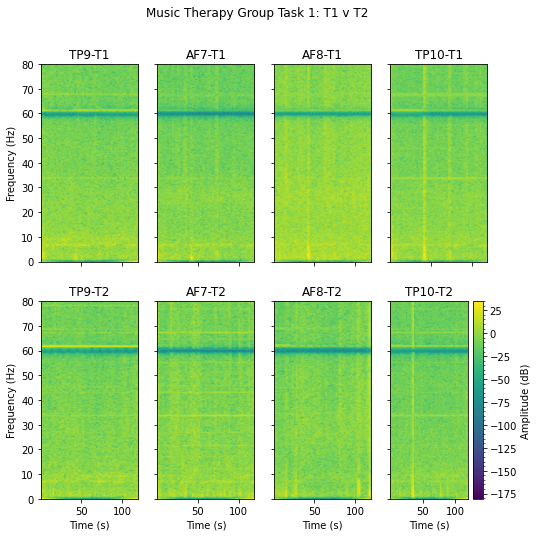

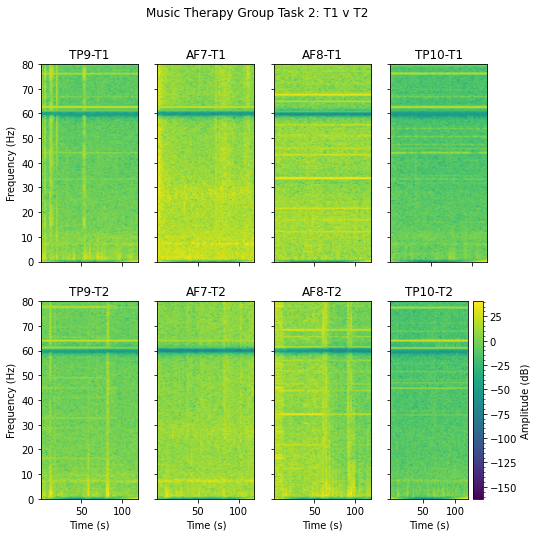

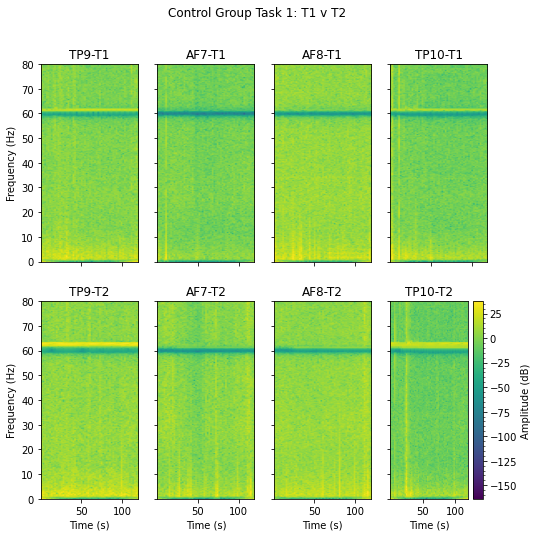

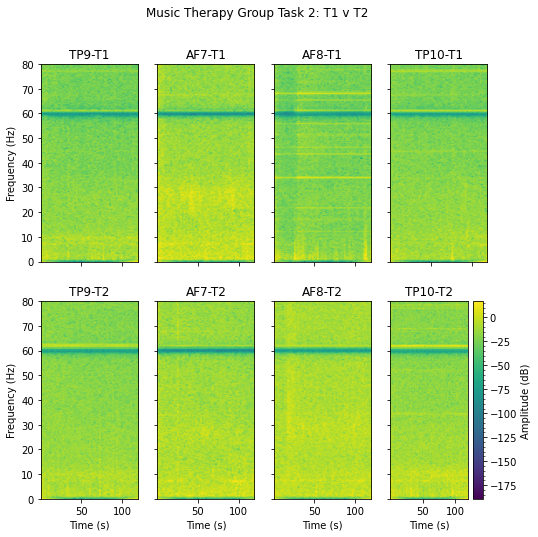

In [9]:
avg_M11 = np.mean(np.stack((bp_M11_1,bp_M11_2,bp_M11_3,bp_M11_4,bp_M11_5)),axis=0)
avg_M21 = np.mean(np.stack((bp_M21_1,bp_M21_2,bp_M21_3,bp_M21_4,bp_M21_5)),axis=0)
avg_M12 = np.mean(np.stack((bp_M12_1,bp_M12_2,bp_M12_3,bp_M12_4,bp_M12_5)),axis=0)
avg_M22 = np.mean(np.stack((bp_M22_1,bp_M22_2,bp_M22_3,bp_M22_4,bp_M22_5)),axis=0)
avg_C11 = np.mean(np.stack((bp_C11_1,bp_C11_2,bp_C11_3,bp_C11_4,bp_C11_5)),axis=0)
avg_C21 = np.mean(np.stack((bp_C21_1,bp_C21_2,bp_C21_3,bp_C21_4,bp_C21_5)),axis=0)
avg_C12 = np.mean(np.stack((bp_C12_1,bp_C12_2,bp_C12_3,bp_C12_4,bp_C12_5)),axis=0)
avg_C22 = np.mean(np.stack((bp_C22_1,bp_C22_2,bp_C22_3,bp_C22_4,bp_C22_5)),axis=0)
spectogramPlot((np.hstack((avg_M11,avg_M12))),cfg.fs,cfg.nfft,cfg.noverlap,(8,8),['TP9-T1','AF7-T1','AF8-T1','TP10-T1','TP9-T2','AF7-T2','AF8-T2','TP10-T2'],'Music Therapy Group Task 1: T1 v T2')
spectogramPlot((np.hstack((avg_M21,avg_M22))),cfg.fs,cfg.nfft,cfg.noverlap,(8,8),['TP9-T1','AF7-T1','AF8-T1','TP10-T1','TP9-T2','AF7-T2','AF8-T2','TP10-T2'],'Music Therapy Group Task 2: T1 v T2')
spectogramPlot((np.hstack((avg_C11,avg_C12))),cfg.fs,cfg.nfft,cfg.noverlap,(8,8),['TP9-T1','AF7-T1','AF8-T1','TP10-T1','TP9-T2','AF7-T2','AF8-T2','TP10-T2'],'Control Group Task 1: T1 v T2')
spectogramPlot((np.hstack((avg_C21,avg_C22))),cfg.fs,cfg.nfft,cfg.noverlap,(8,8),['TP9-T1','AF7-T1','AF8-T1','TP10-T1','TP9-T2','AF7-T2','AF8-T2','TP10-T2'],'Music Therapy Group Task 2: T1 v T2')

In [10]:
# compute power spectrum of each window per channel
delta_low = cfg.brainwaves['delta'][0]
delta_high = cfg.brainwaves['delta'][1]
theta_low = cfg.brainwaves['theta'][0]
theta_high = cfg.brainwaves['theta'][1]
alpha_low = cfg.brainwaves['alpha'][0]
alpha_high = cfg.brainwaves['alpha'][1]
beta_low = cfg.brainwaves['beta'][0]
beta_high = cfg.brainwaves['beta'][1]
gamma_low = cfg.brainwaves['gamma'][0]
gamma_high = cfg.brainwaves['gamma'][1]

In [11]:
#   delta
delta_M11_1 = avgBandPower(bp_M11_1,cfg.fs,delta_low,delta_high)
delta_M11_2 = avgBandPower(bp_M11_2,cfg.fs,delta_low,delta_high)
delta_M11_3 = avgBandPower(bp_M11_3,cfg.fs,delta_low,delta_high)
delta_M11_4 = avgBandPower(bp_M11_4,cfg.fs,delta_low,delta_high)
delta_M11_5 = avgBandPower(bp_M11_5,cfg.fs,delta_low,delta_high)

delta_M21_1 = avgBandPower(bp_M21_1,cfg.fs,delta_low,delta_high)
delta_M21_2 = avgBandPower(bp_M21_2,cfg.fs,delta_low,delta_high)
delta_M21_3 = avgBandPower(bp_M21_3,cfg.fs,delta_low,delta_high)
delta_M21_4 = avgBandPower(bp_M21_4,cfg.fs,delta_low,delta_high)
delta_M21_5 = avgBandPower(bp_M21_5,cfg.fs,delta_low,delta_high)

delta_M12_1 = avgBandPower(bp_M12_1,cfg.fs,delta_low,delta_high)
delta_M12_2 = avgBandPower(bp_M12_2,cfg.fs,delta_low,delta_high)
delta_M12_3 = avgBandPower(bp_M12_3,cfg.fs,delta_low,delta_high)
delta_M12_4 = avgBandPower(bp_M12_4,cfg.fs,delta_low,delta_high)
delta_M12_5 = avgBandPower(bp_M12_5,cfg.fs,delta_low,delta_high)

delta_M22_1 = avgBandPower(bp_M22_1,cfg.fs,delta_low,delta_high)
delta_M22_2 = avgBandPower(bp_M22_2,cfg.fs,delta_low,delta_high)
delta_M22_3 = avgBandPower(bp_M22_3,cfg.fs,delta_low,delta_high)
delta_M22_4 = avgBandPower(bp_M22_4,cfg.fs,delta_low,delta_high)
delta_M22_5 = avgBandPower(bp_M22_5,cfg.fs,delta_low,delta_high)

delta_C11_1 = avgBandPower(bp_C11_1,cfg.fs,delta_low,delta_high)
delta_C11_2 = avgBandPower(bp_C11_2,cfg.fs,delta_low,delta_high)
delta_C11_3 = avgBandPower(bp_C11_3,cfg.fs,delta_low,delta_high)
delta_C11_4 = avgBandPower(bp_C11_4,cfg.fs,delta_low,delta_high)
delta_C11_5 = avgBandPower(bp_C11_5,cfg.fs,delta_low,delta_high)

delta_C21_1 = avgBandPower(bp_C21_1,cfg.fs,delta_low,delta_high)
delta_C21_2 = avgBandPower(bp_C21_2,cfg.fs,delta_low,delta_high)
delta_C21_3 = avgBandPower(bp_C21_3,cfg.fs,delta_low,delta_high)
delta_C21_4 = avgBandPower(bp_C21_4,cfg.fs,delta_low,delta_high)
delta_C21_5 = avgBandPower(bp_C21_5,cfg.fs,delta_low,delta_high)

delta_C12_1 = avgBandPower(bp_C12_1,cfg.fs,delta_low,delta_high)
delta_C12_2 = avgBandPower(bp_C12_2,cfg.fs,delta_low,delta_high)
delta_C12_3 = avgBandPower(bp_C12_3,cfg.fs,delta_low,delta_high)
delta_C12_4 = avgBandPower(bp_C12_4,cfg.fs,delta_low,delta_high)
delta_C12_5 = avgBandPower(bp_C12_5,cfg.fs,delta_low,delta_high)


delta_C22_1 = avgBandPower(bp_C22_1,cfg.fs,delta_low,delta_high)
delta_C22_2 = avgBandPower(bp_C22_2,cfg.fs,delta_low,delta_high)
delta_C22_3 = avgBandPower(bp_C22_3,cfg.fs,delta_low,delta_high)
delta_C22_4 = avgBandPower(bp_C22_4,cfg.fs,delta_low,delta_high)
delta_C22_5 = avgBandPower(bp_C22_5,cfg.fs,delta_low,delta_high)

In [12]:
# Theta
theta_M11_1 = avgBandPower(bp_M11_1,cfg.fs,theta_low,theta_high)
theta_M11_2 = avgBandPower(bp_M11_2,cfg.fs,theta_low,theta_high)
theta_M11_3 = avgBandPower(bp_M11_3,cfg.fs,theta_low,theta_high)
theta_M11_4 = avgBandPower(bp_M11_4,cfg.fs,theta_low,theta_high)
theta_M11_5 = avgBandPower(bp_M11_5,cfg.fs,theta_low,theta_high)

theta_M21_1 = avgBandPower(bp_M21_1,cfg.fs,theta_low,theta_high)
theta_M21_2 = avgBandPower(bp_M21_2,cfg.fs,theta_low,theta_high)
theta_M21_3 = avgBandPower(bp_M21_3,cfg.fs,theta_low,theta_high)
theta_M21_4 = avgBandPower(bp_M21_4,cfg.fs,theta_low,theta_high)
theta_M21_5 = avgBandPower(bp_M21_5,cfg.fs,theta_low,theta_high)

theta_M12_1 = avgBandPower(bp_M12_1,cfg.fs,theta_low,theta_high)
theta_M12_2 = avgBandPower(bp_M12_2,cfg.fs,theta_low,theta_high)
theta_M12_3 = avgBandPower(bp_M12_3,cfg.fs,theta_low,theta_high)
theta_M12_4 = avgBandPower(bp_M12_4,cfg.fs,theta_low,theta_high)
theta_M12_5 = avgBandPower(bp_M12_5,cfg.fs,theta_low,theta_high)

theta_M22_1 = avgBandPower(bp_M22_1,cfg.fs,theta_low,theta_high)
theta_M22_2 = avgBandPower(bp_M22_2,cfg.fs,theta_low,theta_high)
theta_M22_3 = avgBandPower(bp_M22_3,cfg.fs,theta_low,theta_high)
theta_M22_4 = avgBandPower(bp_M22_4,cfg.fs,theta_low,theta_high)
theta_M22_5 = avgBandPower(bp_M22_5,cfg.fs,theta_low,theta_high)

theta_C11_1 = avgBandPower(bp_C11_1,cfg.fs,theta_low,theta_high)
theta_C11_2 = avgBandPower(bp_C11_2,cfg.fs,theta_low,theta_high)
theta_C11_3 = avgBandPower(bp_C11_3,cfg.fs,theta_low,theta_high)
theta_C11_4 = avgBandPower(bp_C11_4,cfg.fs,theta_low,theta_high)
theta_C11_5 = avgBandPower(bp_C11_5,cfg.fs,theta_low,theta_high)

theta_C21_1 = avgBandPower(bp_C21_1,cfg.fs,theta_low,theta_high)
theta_C21_2 = avgBandPower(bp_C21_2,cfg.fs,theta_low,theta_high)
theta_C21_3 = avgBandPower(bp_C21_3,cfg.fs,theta_low,theta_high)
theta_C21_4 = avgBandPower(bp_C21_4,cfg.fs,theta_low,theta_high)
theta_C21_5 = avgBandPower(bp_C21_5,cfg.fs,theta_low,theta_high)

theta_C12_1 = avgBandPower(bp_C12_1,cfg.fs,theta_low,theta_high)
theta_C12_2 = avgBandPower(bp_C12_2,cfg.fs,theta_low,theta_high)
theta_C12_3 = avgBandPower(bp_C12_3,cfg.fs,theta_low,theta_high)
theta_C12_4 = avgBandPower(bp_C12_4,cfg.fs,theta_low,theta_high)
theta_C12_5 = avgBandPower(bp_C12_5,cfg.fs,theta_low,theta_high)


theta_C22_1 = avgBandPower(bp_C22_1,cfg.fs,theta_low,theta_high)
theta_C22_2 = avgBandPower(bp_C22_2,cfg.fs,theta_low,theta_high)
theta_C22_3 = avgBandPower(bp_C22_3,cfg.fs,theta_low,theta_high)
theta_C22_4 = avgBandPower(bp_C22_4,cfg.fs,theta_low,theta_high)
theta_C22_5 = avgBandPower(bp_C22_5,cfg.fs,theta_low,theta_high)

In [13]:
# Alpha
alpha_M11_1 = avgBandPower(bp_M11_1,cfg.fs,alpha_low,alpha_high)
alpha_M11_2 = avgBandPower(bp_M11_2,cfg.fs,alpha_low,alpha_high)
alpha_M11_3 = avgBandPower(bp_M11_3,cfg.fs,alpha_low,alpha_high)
alpha_M11_4 = avgBandPower(bp_M11_4,cfg.fs,alpha_low,alpha_high)
alpha_M11_5 = avgBandPower(bp_M11_5,cfg.fs,alpha_low,alpha_high)

alpha_M21_1 = avgBandPower(bp_M21_1,cfg.fs,alpha_low,alpha_high)
alpha_M21_2 = avgBandPower(bp_M21_2,cfg.fs,alpha_low,alpha_high)
alpha_M21_3 = avgBandPower(bp_M21_3,cfg.fs,alpha_low,alpha_high)
alpha_M21_4 = avgBandPower(bp_M21_4,cfg.fs,alpha_low,alpha_high)
alpha_M21_5 = avgBandPower(bp_M21_5,cfg.fs,alpha_low,alpha_high)

alpha_M12_1 = avgBandPower(bp_M12_1,cfg.fs,alpha_low,alpha_high)
alpha_M12_2 = avgBandPower(bp_M12_2,cfg.fs,alpha_low,alpha_high)
alpha_M12_3 = avgBandPower(bp_M12_3,cfg.fs,alpha_low,alpha_high)
alpha_M12_4 = avgBandPower(bp_M12_4,cfg.fs,alpha_low,alpha_high)
alpha_M12_5 = avgBandPower(bp_M12_5,cfg.fs,alpha_low,alpha_high)

alpha_M22_1 = avgBandPower(bp_M22_1,cfg.fs,alpha_low,alpha_high)
alpha_M22_2 = avgBandPower(bp_M22_2,cfg.fs,alpha_low,alpha_high)
alpha_M22_3 = avgBandPower(bp_M22_3,cfg.fs,alpha_low,alpha_high)
alpha_M22_4 = avgBandPower(bp_M22_4,cfg.fs,alpha_low,alpha_high)
alpha_M22_5 = avgBandPower(bp_M22_5,cfg.fs,alpha_low,alpha_high)

alpha_C11_1 = avgBandPower(bp_C11_1,cfg.fs,alpha_low,alpha_high)
alpha_C11_2 = avgBandPower(bp_C11_2,cfg.fs,alpha_low,alpha_high)
alpha_C11_3 = avgBandPower(bp_C11_3,cfg.fs,alpha_low,alpha_high)
alpha_C11_4 = avgBandPower(bp_C11_4,cfg.fs,alpha_low,alpha_high)
alpha_C11_5 = avgBandPower(bp_C11_5,cfg.fs,alpha_low,alpha_high)

alpha_C21_1 = avgBandPower(bp_C21_1,cfg.fs,alpha_low,alpha_high)
alpha_C21_2 = avgBandPower(bp_C21_2,cfg.fs,alpha_low,alpha_high)
alpha_C21_3 = avgBandPower(bp_C21_3,cfg.fs,alpha_low,alpha_high)
alpha_C21_4 = avgBandPower(bp_C21_4,cfg.fs,alpha_low,alpha_high)
alpha_C21_5 = avgBandPower(bp_C21_5,cfg.fs,alpha_low,alpha_high)

alpha_C12_1 = avgBandPower(bp_C12_1,cfg.fs,alpha_low,alpha_high)
alpha_C12_2 = avgBandPower(bp_C12_2,cfg.fs,alpha_low,alpha_high)
alpha_C12_3 = avgBandPower(bp_C12_3,cfg.fs,alpha_low,alpha_high)
alpha_C12_4 = avgBandPower(bp_C12_4,cfg.fs,alpha_low,alpha_high)
alpha_C12_5 = avgBandPower(bp_C12_5,cfg.fs,alpha_low,alpha_high)

alpha_C22_1 = avgBandPower(bp_C22_1,cfg.fs,alpha_low,alpha_high)
alpha_C22_2 = avgBandPower(bp_C22_2,cfg.fs,alpha_low,alpha_high)
alpha_C22_3 = avgBandPower(bp_C22_3,cfg.fs,alpha_low,alpha_high)
alpha_C22_4 = avgBandPower(bp_C22_4,cfg.fs,alpha_low,alpha_high)
alpha_C22_5 = avgBandPower(bp_C22_5,cfg.fs,alpha_low,alpha_high)

In [14]:
# Beta
beta_M11_1 = avgBandPower(bp_M11_1,cfg.fs,beta_low,beta_high)
beta_M11_2 = avgBandPower(bp_M11_2,cfg.fs,beta_low,beta_high)
beta_M11_3 = avgBandPower(bp_M11_3,cfg.fs,beta_low,beta_high)
beta_M11_4 = avgBandPower(bp_M11_4,cfg.fs,beta_low,beta_high)
beta_M11_5 = avgBandPower(bp_M11_5,cfg.fs,beta_low,beta_high)

beta_M21_1 = avgBandPower(bp_M21_1,cfg.fs,beta_low,beta_high)
beta_M21_2 = avgBandPower(bp_M21_2,cfg.fs,beta_low,beta_high)
beta_M21_3 = avgBandPower(bp_M21_3,cfg.fs,beta_low,beta_high)
beta_M21_4 = avgBandPower(bp_M21_4,cfg.fs,beta_low,beta_high)
beta_M21_5 = avgBandPower(bp_M21_5,cfg.fs,beta_low,beta_high)

beta_M12_1 = avgBandPower(bp_M12_1,cfg.fs,beta_low,beta_high)
beta_M12_2 = avgBandPower(bp_M12_2,cfg.fs,beta_low,beta_high)
beta_M12_3 = avgBandPower(bp_M12_3,cfg.fs,beta_low,beta_high)
beta_M12_4 = avgBandPower(bp_M12_4,cfg.fs,beta_low,beta_high)
beta_M12_5 = avgBandPower(bp_M12_5,cfg.fs,beta_low,beta_high)

beta_M22_1 = avgBandPower(bp_M22_1,cfg.fs,beta_low,beta_high)
beta_M22_2 = avgBandPower(bp_M22_2,cfg.fs,beta_low,beta_high)
beta_M22_3 = avgBandPower(bp_M22_3,cfg.fs,beta_low,beta_high)
beta_M22_4 = avgBandPower(bp_M22_4,cfg.fs,beta_low,beta_high)
beta_M22_5 = avgBandPower(bp_M22_5,cfg.fs,beta_low,beta_high)

beta_C11_1 = avgBandPower(bp_C11_1,cfg.fs,beta_low,beta_high)
beta_C11_2 = avgBandPower(bp_C11_2,cfg.fs,beta_low,beta_high)
beta_C11_3 = avgBandPower(bp_C11_3,cfg.fs,beta_low,beta_high)
beta_C11_4 = avgBandPower(bp_C11_4,cfg.fs,beta_low,beta_high)
beta_C11_5 = avgBandPower(bp_C11_5,cfg.fs,beta_low,beta_high)

beta_C21_1 = avgBandPower(bp_C21_1,cfg.fs,beta_low,beta_high)
beta_C21_2 = avgBandPower(bp_C21_2,cfg.fs,beta_low,beta_high)
beta_C21_3 = avgBandPower(bp_C21_3,cfg.fs,beta_low,beta_high)
beta_C21_4 = avgBandPower(bp_C21_4,cfg.fs,beta_low,beta_high)
beta_C21_5 = avgBandPower(bp_C21_5,cfg.fs,beta_low,beta_high)

beta_C12_1 = avgBandPower(bp_C12_1,cfg.fs,beta_low,beta_high)
beta_C12_2 = avgBandPower(bp_C12_2,cfg.fs,beta_low,beta_high)
beta_C12_3 = avgBandPower(bp_C12_3,cfg.fs,beta_low,beta_high)
beta_C12_4 = avgBandPower(bp_C12_4,cfg.fs,beta_low,beta_high)
beta_C12_5 = avgBandPower(bp_C12_5,cfg.fs,beta_low,beta_high)

beta_C22_1 = avgBandPower(bp_C22_1,cfg.fs,beta_low,beta_high)
beta_C22_2 = avgBandPower(bp_C22_2,cfg.fs,beta_low,beta_high)
beta_C22_3 = avgBandPower(bp_C22_3,cfg.fs,beta_low,beta_high)
beta_C22_4 = avgBandPower(bp_C22_4,cfg.fs,beta_low,beta_high)
beta_C22_5 = avgBandPower(bp_C22_5,cfg.fs,beta_low,beta_high)

In [15]:
# Gamma
gamma_M11_1 = avgBandPower(bp_M11_1,cfg.fs,gamma_low,gamma_high)
gamma_M11_2 = avgBandPower(bp_M11_2,cfg.fs,gamma_low,gamma_high)
gamma_M11_3 = avgBandPower(bp_M11_3,cfg.fs,gamma_low,gamma_high)
gamma_M11_4 = avgBandPower(bp_M11_4,cfg.fs,gamma_low,gamma_high)
gamma_M11_5 = avgBandPower(bp_M11_5,cfg.fs,gamma_low,gamma_high)

gamma_M21_1 = avgBandPower(bp_M21_1,cfg.fs,gamma_low,gamma_high)
gamma_M21_2 = avgBandPower(bp_M21_2,cfg.fs,gamma_low,gamma_high)
gamma_M21_3 = avgBandPower(bp_M21_3,cfg.fs,gamma_low,gamma_high)
gamma_M21_4 = avgBandPower(bp_M21_4,cfg.fs,gamma_low,gamma_high)
gamma_M21_5 = avgBandPower(bp_M21_5,cfg.fs,gamma_low,gamma_high)

gamma_M12_1 = avgBandPower(bp_M12_1,cfg.fs,gamma_low,gamma_high)
gamma_M12_2 = avgBandPower(bp_M12_2,cfg.fs,gamma_low,gamma_high)
gamma_M12_3 = avgBandPower(bp_M12_3,cfg.fs,gamma_low,gamma_high)
gamma_M12_4 = avgBandPower(bp_M12_4,cfg.fs,gamma_low,gamma_high)
gamma_M12_5 = avgBandPower(bp_M12_5,cfg.fs,gamma_low,gamma_high)

gamma_M22_1 = avgBandPower(bp_M22_1,cfg.fs,gamma_low,gamma_high)
gamma_M22_2 = avgBandPower(bp_M22_2,cfg.fs,gamma_low,gamma_high)
gamma_M22_3 = avgBandPower(bp_M22_3,cfg.fs,gamma_low,gamma_high)
gamma_M22_4 = avgBandPower(bp_M22_4,cfg.fs,gamma_low,gamma_high)
gamma_M22_5 = avgBandPower(bp_M22_5,cfg.fs,gamma_low,gamma_high)

gamma_C11_1 = avgBandPower(bp_C11_1,cfg.fs,gamma_low,gamma_high)
gamma_C11_2 = avgBandPower(bp_C11_2,cfg.fs,gamma_low,gamma_high)
gamma_C11_3 = avgBandPower(bp_C11_3,cfg.fs,gamma_low,gamma_high)
gamma_C11_4 = avgBandPower(bp_C11_4,cfg.fs,gamma_low,gamma_high)
gamma_C11_5 = avgBandPower(bp_C11_5,cfg.fs,gamma_low,gamma_high)

gamma_C21_1 = avgBandPower(bp_C21_1,cfg.fs,gamma_low,gamma_high)
gamma_C21_2 = avgBandPower(bp_C21_2,cfg.fs,gamma_low,gamma_high)
gamma_C21_3 = avgBandPower(bp_C21_3,cfg.fs,gamma_low,gamma_high)
gamma_C21_4 = avgBandPower(bp_C21_4,cfg.fs,gamma_low,gamma_high)
gamma_C21_5 = avgBandPower(bp_C21_5,cfg.fs,gamma_low,gamma_high)

gamma_C12_1 = avgBandPower(bp_C12_1,cfg.fs,gamma_low,gamma_high)
gamma_C12_2 = avgBandPower(bp_C12_2,cfg.fs,gamma_low,gamma_high)
gamma_C12_3 = avgBandPower(bp_C12_3,cfg.fs,gamma_low,gamma_high)
gamma_C12_4 = avgBandPower(bp_C12_4,cfg.fs,gamma_low,gamma_high)
gamma_C12_5 = avgBandPower(bp_C12_5,cfg.fs,gamma_low,gamma_high)

gamma_C22_1 = avgBandPower(bp_C22_1,cfg.fs,gamma_low,gamma_high)
gamma_C22_2 = avgBandPower(bp_C22_2,cfg.fs,gamma_low,gamma_high)
gamma_C22_3 = avgBandPower(bp_C22_3,cfg.fs,gamma_low,gamma_high)
gamma_C22_4 = avgBandPower(bp_C22_4,cfg.fs,gamma_low,gamma_high)
gamma_C22_5 = avgBandPower(bp_C22_5,cfg.fs,gamma_low,gamma_high)

In [16]:
delta_M11 = np.mean(np.vstack((delta_M11_1,delta_M11_2,delta_M11_3,delta_M11_4,delta_M11_5)),axis=0)
delta_M21 = np.mean(np.vstack((delta_M21_1,delta_M21_2,delta_M21_3,delta_M21_4,delta_M21_5)),axis=0)
delta_M12 = np.mean(np.vstack((delta_M12_1,delta_M12_2,delta_M12_3,delta_M12_4,delta_M12_5)),axis=0)
delta_M22 = np.mean(np.vstack((delta_M22_1,delta_M22_2,delta_M22_3,delta_M22_4,delta_M22_5)),axis=0)
delta_C11 = np.mean(np.vstack((delta_C11_1,delta_C11_2,delta_C11_3,delta_C11_4,delta_C11_5)),axis=0)
delta_C21 = np.mean(np.vstack((delta_C21_1,delta_C21_2,delta_C21_3,delta_C21_4,delta_C21_5)),axis=0)
delta_C12 = np.mean(np.vstack((delta_C12_1,delta_C12_2,delta_C12_3,delta_C12_4,delta_C12_5)),axis=0)
delta_C22 = np.mean(np.vstack((delta_C22_1,delta_C22_2,delta_C22_3,delta_C22_4,delta_C22_5)),axis=0)

theta_M11 = np.mean(np.vstack((theta_M11_1,theta_M11_2,theta_M11_3,theta_M11_4,theta_M11_5)),axis=0)
theta_M21 = np.mean(np.vstack((theta_M21_1,theta_M21_2,theta_M21_3,theta_M21_4,theta_M21_5)),axis=0)
theta_M12 = np.mean(np.vstack((theta_M12_1,theta_M12_2,theta_M12_3,theta_M12_4,theta_M12_5)),axis=0)
theta_M22 = np.mean(np.vstack((theta_M22_1,theta_M22_2,theta_M22_3,theta_M22_4,theta_M22_5)),axis=0)
theta_C11 = np.mean(np.vstack((theta_C11_1,theta_C11_2,theta_C11_3,theta_C11_4,theta_C11_5)),axis=0)
theta_C21 = np.mean(np.vstack((theta_C21_1,theta_C21_2,theta_C21_3,theta_C21_4,theta_C21_5)),axis=0)
theta_C12 = np.mean(np.vstack((theta_C12_1,theta_C12_2,theta_C12_3,theta_C12_4,theta_C12_5)),axis=0)
theta_C22 = np.mean(np.vstack((theta_C22_1,theta_C22_2,theta_C22_3,theta_C22_4,theta_C22_5)),axis=0)

alpha_M11 = np.mean(np.vstack((alpha_M11_1,alpha_M11_2,alpha_M11_3,alpha_M11_4,alpha_M11_5)),axis=0)
alpha_M21 = np.mean(np.vstack((alpha_M21_1,alpha_M21_2,alpha_M21_3,alpha_M21_4,alpha_M21_5)),axis=0)
alpha_M12 = np.mean(np.vstack((alpha_M12_1,alpha_M12_2,alpha_M12_3,alpha_M12_4,alpha_M12_5)),axis=0)
alpha_M22 = np.mean(np.vstack((alpha_M22_1,alpha_M22_2,alpha_M22_3,alpha_M22_4,alpha_M22_5)),axis=0)
alpha_C11 = np.mean(np.vstack((alpha_C11_1,alpha_C11_2,alpha_C11_3,alpha_C11_4,alpha_C11_5)),axis=0)
alpha_C21 = np.mean(np.vstack((alpha_C21_1,alpha_C21_2,alpha_C21_3,alpha_C21_4,alpha_C21_5)),axis=0)
alpha_C12 = np.mean(np.vstack((alpha_C12_1,alpha_C12_2,alpha_C12_3,alpha_C12_4,alpha_C12_5)),axis=0)
alpha_C22 = np.mean(np.vstack((alpha_C22_1,alpha_C22_2,alpha_C22_3,alpha_C22_4,alpha_C22_5)),axis=0)

beta_M11 = np.mean(np.vstack((beta_M11_1,beta_M11_2,beta_M11_3,beta_M11_4,beta_M11_5)),axis=0)
beta_M21 = np.mean(np.vstack((beta_M21_1,beta_M21_2,beta_M21_3,beta_M21_4,beta_M21_5)),axis=0)
beta_M12 = np.mean(np.vstack((beta_M12_1,beta_M12_2,beta_M12_3,beta_M12_4,beta_M12_5)),axis=0)
beta_M22 = np.mean(np.vstack((beta_M22_1,beta_M22_2,beta_M22_3,beta_M22_4,beta_M22_5)),axis=0)
beta_C11 = np.mean(np.vstack((beta_C11_1,beta_C11_2,beta_C11_3,beta_C11_4,beta_C11_5)),axis=0)
beta_C21 = np.mean(np.vstack((beta_C21_1,beta_C21_2,beta_C21_3,beta_C21_4,beta_C21_5)),axis=0)
beta_C12 = np.mean(np.vstack((beta_C12_1,beta_C12_2,beta_C12_3,beta_C12_4,beta_C12_5)),axis=0)
beta_C22 = np.mean(np.vstack((beta_C22_1,beta_C22_2,beta_C22_3,beta_C22_4,beta_C22_5)),axis=0)

gamma_M11 = np.mean(np.vstack((gamma_M11_1,gamma_M11_2,gamma_M11_3,gamma_M11_4,gamma_M11_5)),axis=0)
gamma_M21 = np.mean(np.vstack((gamma_M21_1,gamma_M21_2,gamma_M21_3,gamma_M21_4,gamma_M21_5)),axis=0)
gamma_M12 = np.mean(np.vstack((gamma_M12_1,gamma_M12_2,gamma_M12_3,gamma_M12_4,gamma_M12_5)),axis=0)
gamma_M22 = np.mean(np.vstack((gamma_M22_1,gamma_M22_2,gamma_M22_3,gamma_M22_4,gamma_M22_5)),axis=0)
gamma_C11 = np.mean(np.vstack((gamma_C11_1,gamma_C11_2,gamma_C11_3,gamma_C11_4,gamma_C11_5)),axis=0)
gamma_C21 = np.mean(np.vstack((gamma_C21_1,gamma_C21_2,gamma_C21_3,gamma_C21_4,gamma_C21_5)),axis=0)
gamma_C12 = np.mean(np.vstack((gamma_C12_1,gamma_C12_2,gamma_C12_3,gamma_C12_4,gamma_C12_5)),axis=0)
gamma_C22 = np.mean(np.vstack((gamma_C22_1,gamma_C22_2,gamma_C22_3,gamma_C22_4,gamma_C22_5)),axis=0)

/Users/joshuaighalo/Documents/GitHub/Music-Therapy-EEG-Analysis/helper.py:1061: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
/Users/joshuaighalo/Documents/GitHub/Music-Therapy-EEG-Analysis/helper.py:1061: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
/Users/joshuaighalo/Documents/GitHub/Music-Therapy-EEG-Analysis/helper.py:1061: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
/Users/joshuaighalo/Documents/GitHub/Music-Therapy-EEG-Analysis/helper.py:1061: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
/Users/joshuaighalo/Documents/GitHub/Music-Therapy-EEG-Analysis/

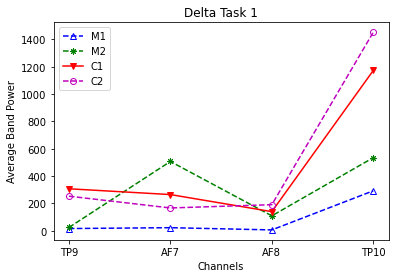

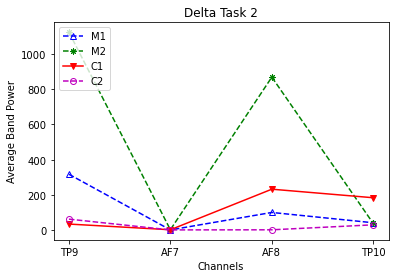

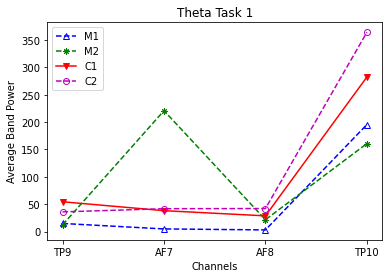

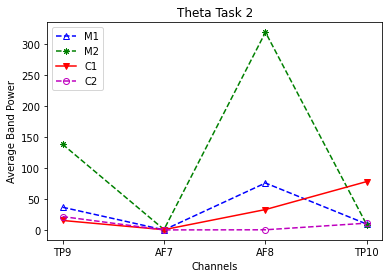

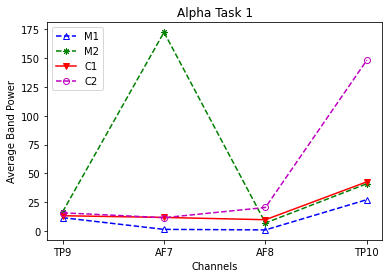

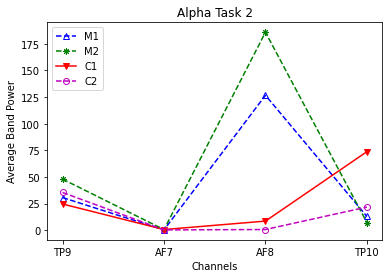

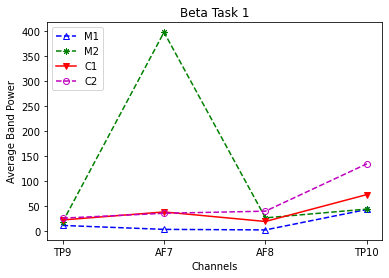

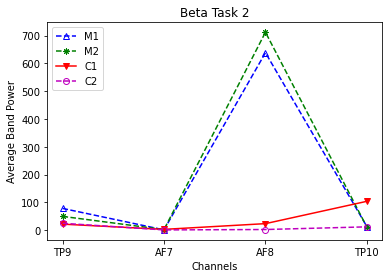

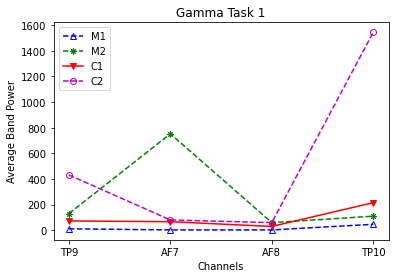

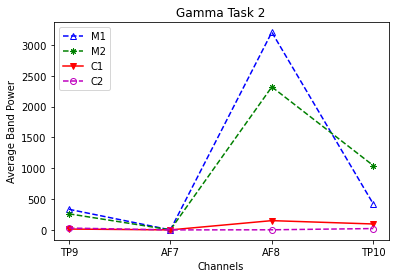

In [17]:
#delta_C22,theta_C22,alpha_C22,beta_C22,gamma_C22 = [0,0,0,0],[0,0,0,0],[0,0,0,0],[0,0,0,0],[0,0,0,0]
bandpowerPlots(cfg.channels,[delta_M11,delta_M12,delta_C11,delta_C12],'Delta Task 1',['M1','M2','C1','C2'])
bandpowerPlots(cfg.channels,[delta_M21,delta_M22,delta_C21,delta_C22],'Delta Task 2',['M1','M2','C1','C2'])
bandpowerPlots(cfg.channels,[theta_M11,theta_M12,theta_C11,theta_C12],'Theta Task 1',['M1','M2','C1','C2'])
bandpowerPlots(cfg.channels,[theta_M21,theta_M22,theta_C21,theta_C22],'Theta Task 2',['M1','M2','C1','C2'])
bandpowerPlots(cfg.channels,[alpha_M11,alpha_M12,alpha_C11,alpha_C12],'Alpha Task 1',['M1','M2','C1','C2'])
bandpowerPlots(cfg.channels,[alpha_M21,alpha_M22,alpha_C21,alpha_C22],'Alpha Task 2',['M1','M2','C1','C2'])
bandpowerPlots(cfg.channels,[beta_M11,beta_M12,beta_C11,beta_C12],'Beta Task 1',['M1','M2','C1','C2'])
bandpowerPlots(cfg.channels,[beta_M21,beta_M22,beta_C21,beta_C22],'Beta Task 2',['M1','M2','C1','C2'])
bandpowerPlots(cfg.channels,[gamma_M11,gamma_M12,gamma_C11,gamma_C12],'Gamma Task 1',['M1','M2','C1','C2'])
bandpowerPlots(cfg.channels,[gamma_M21,gamma_M22,gamma_C21,gamma_C22],'Gamma Task 2',['M1','M2','C1','C2'])

In [18]:
#   compute average delta band power for both music therapy and control group
data_pre = np.vstack((delta_M11,delta_M12,delta_C11,delta_C12,delta_M21,delta_M22,delta_C21,delta_C22,
                     theta_M11,theta_M12,theta_C11,theta_C12,theta_M21,theta_M22,theta_C21,theta_C22,
                     alpha_M11,alpha_M12,alpha_C11,alpha_C12,alpha_M21,alpha_M22,alpha_C21,alpha_C22,
                     beta_M11,beta_M12,beta_C11,beta_C12,beta_M21,beta_M22,beta_C21,beta_C22,
                     gamma_M11,gamma_M12,gamma_C11,gamma_C12,gamma_M21,gamma_M22,gamma_C21,gamma_C22))

data_post = np.vstack((delta_M11,delta_M12,delta_C11,delta_C12,delta_M21,delta_M22,delta_C21,delta_C22,
                        theta_M11,theta_M12,theta_C11,theta_C12,theta_M21,theta_M22,theta_C21,theta_C22,
                        alpha_M11,alpha_M12,alpha_C11,alpha_C12,alpha_M21,alpha_M22,alpha_C21,alpha_C22,
                        beta_M11,beta_M12,beta_C11,beta_C12,beta_M21,beta_M22,beta_C21,beta_C22,
                        gamma_M11,gamma_M12,gamma_C11,gamma_C12,gamma_M21,gamma_M22,gamma_C21,gamma_C22))
                    
data_pre = np.hstack((data_pre[:,0],data_pre[:,1],data_pre[:,2],data_pre[:,3]))
data_post = np.hstack((data_post[:,0],data_post[:,1],data_post[:,2],data_post[:,3]))
diff = data_pre - data_post
test_1 = normalityTest(diff)

....Executing Shapiro Wilks Test.......... 

Shapiro Wilks Test: data is normally distributed, P-Value= 1.0

....confirming Shapiro Wilks Test normality result with D’Agostino’s K^2 test.........

....Executing D’Agostino’s K^2 Test..........

 Paired T-test utilized to evaluate significance of data


/opt/anaconda3/lib/python3.9/site-packages/scipy/stats/_morestats.py:1758: UserWarning: Input data for shapiro has range zero. The results may not be accurate.
  warnings.warn("Input data for shapiro has range zero. The results "


In [19]:
#   Arrange participant power per channel for stat testing
pp_delta_M11 = np.vstack((delta_M11_1,delta_M11_2,delta_M11_3,delta_M11_4,delta_M11_5))
pp_delta_M12 = np.vstack((delta_M12_1,delta_M12_2,delta_M12_3,delta_M12_4,delta_M12_5))
pp_delta_C11 = np.vstack((delta_C11_1,delta_C11_2,delta_C11_3,delta_C11_4,delta_C11_5))
pp_delta_C12 = np.vstack((delta_C12_1,delta_C12_2,delta_C12_3,delta_C12_4,delta_C12_5))
pp_delta_M21 = np.vstack((delta_M21_1,delta_M21_2,delta_M21_3,delta_M21_4,delta_M21_5))
pp_delta_M22 = np.vstack((delta_M22_1,delta_M22_2,delta_M22_3,delta_M22_4,delta_M22_5))
pp_delta_C21 = np.vstack((delta_C21_1,delta_C21_2,delta_C21_3,delta_C21_4,delta_C21_5))
pp_delta_C22 = np.vstack((delta_C22_1,delta_C22_2,delta_C22_3,delta_C22_4,delta_C22_5))
pp_theta_M11 = np.vstack((theta_M11_1,theta_M11_2,theta_M11_3,theta_M11_4,theta_M11_5))
pp_theta_M12 = np.vstack((theta_M12_1,theta_M12_2,theta_M12_3,theta_M12_4,theta_M12_5))
pp_theta_C11 = np.vstack((theta_C11_1,theta_C11_2,theta_C11_3,theta_C11_4,theta_C11_5))
pp_theta_C12 = np.vstack((theta_C12_1,theta_C12_2,theta_C12_3,theta_C12_4,theta_C12_5))
pp_theta_M21 = np.vstack((theta_M21_1,theta_M21_2,theta_M21_3,theta_M21_4,theta_M21_5))
pp_theta_M22 = np.vstack((theta_M22_1,theta_M22_2,theta_M22_3,theta_M22_4,theta_M22_5))
pp_theta_C21 = np.vstack((theta_C21_1,theta_C21_2,theta_C21_3,theta_C21_4,theta_C21_5))
pp_theta_C22 = np.vstack((theta_C22_1,theta_C22_2,theta_C22_3,theta_C22_4,theta_C22_5))
pp_alpha_M11 = np.vstack((alpha_M11_1,alpha_M11_2,alpha_M11_3,alpha_M11_4,alpha_M11_5))
pp_alpha_M12 = np.vstack((alpha_M12_1,alpha_M12_2,alpha_M12_3,alpha_M12_4,alpha_M12_5))
pp_alpha_C11 = np.vstack((alpha_C11_1,alpha_C11_2,alpha_C11_3,alpha_C11_4,alpha_C11_5))
pp_alpha_C12 = np.vstack((alpha_C12_1,alpha_C12_2,alpha_C12_3,alpha_C12_4,alpha_C12_5))
pp_alpha_M21 = np.vstack((alpha_M21_1,alpha_M21_2,alpha_M21_3,alpha_M21_4,alpha_M21_5))
pp_alpha_M22 = np.vstack((alpha_M22_1,alpha_M22_2,alpha_M22_3,alpha_M22_4,alpha_M22_5))
pp_alpha_C21 = np.vstack((alpha_C21_1,alpha_C21_2,alpha_C21_3,alpha_C21_4,alpha_C21_5))
pp_alpha_C22 = np.vstack((alpha_C22_1,alpha_C22_2,alpha_C22_3,alpha_C22_4,alpha_C22_5))
pp_beta_M11 = np.vstack((beta_M11_1,beta_M11_2,beta_M11_3,beta_M11_4,beta_M11_5))
pp_beta_M12 = np.vstack((beta_M12_1,beta_M12_2,beta_M12_3,beta_M12_4,beta_M12_5))
pp_beta_C11 = np.vstack((beta_C11_1,beta_C11_2,beta_C11_3,beta_C11_4,beta_C11_5))
pp_beta_C12 = np.vstack((beta_C12_1,beta_C12_2,beta_C12_3,beta_C12_4,beta_C12_5))
pp_beta_M21 = np.vstack((beta_M21_1,beta_M21_2,beta_M21_3,beta_M21_4,beta_M21_5))
pp_beta_M22 = np.vstack((beta_M22_1,beta_M22_2,beta_M22_3,beta_M22_4,beta_M22_5))
pp_beta_C21 = np.vstack((beta_C21_1,beta_C21_2,beta_C21_3,beta_C21_4,beta_C21_5))
pp_beta_C22 = np.vstack((beta_C22_1,beta_C22_2,beta_C22_3,beta_C22_4,beta_C22_5))
pp_gamma_M11 = np.vstack((gamma_M11_1,gamma_M11_2,gamma_M11_3,gamma_M11_4,gamma_M11_5))
pp_gamma_M12 = np.vstack((gamma_M12_1,gamma_M12_2,gamma_M12_3,gamma_M12_4,gamma_M12_5))
pp_gamma_C11 = np.vstack((gamma_C11_1,gamma_C11_2,gamma_C11_3,gamma_C11_4,gamma_C11_5))
pp_gamma_C12 = np.vstack((gamma_C12_1,gamma_C12_2,gamma_C12_3,gamma_C12_4,gamma_C12_5))
pp_gamma_M21 = np.vstack((gamma_M21_1,gamma_M21_2,gamma_M21_3,gamma_M21_4,gamma_M21_5))
pp_gamma_M22 = np.vstack((gamma_M22_1,gamma_M22_2,gamma_M22_3,gamma_M22_4,gamma_M22_5))
pp_gamma_C21 = np.vstack((gamma_C21_1,gamma_C21_2,gamma_C21_3,gamma_C21_4,gamma_C21_5))
pp_gamma_C22 = np.vstack((gamma_C22_1,gamma_C22_2,gamma_C22_3,gamma_C22_4,gamma_C22_5))

In [20]:
test_type = test_1
#   compute paired t-test for the difference between the average delta band power for the two groups

print ('DELTA BAND')
ttest_delta_M1121 = statTest(test_type,pp_delta_M11,pp_delta_M12, show_output=True,variableName='Delta Music Task 1',channelName=['TP9','AF7','AF8','TP10'])
ttest_delta_M2121 = statTest(test_type,pp_delta_M21,pp_delta_M22, show_output=True,variableName='Delta Music Task 2',channelName=['TP9','AF7','AF8','TP10'])
ttest_delta_C1121 = statTest(test_type,pp_delta_C11,pp_delta_C12, show_output=True,variableName='Delta Control Task 1',channelName=['TP9','AF7','AF8','TP10'])
ttest_delta_C2121 = statTest(test_type,pp_delta_C21,pp_delta_C22, show_output=True,variableName='Delta Control Task 2',channelName=['TP9','AF7','AF8','TP10'])

print ('THETA BAND')
ttest_theta_M1121 = statTest(test_type,pp_theta_M11,pp_theta_M12, show_output=True,variableName='Theta Music Task 1',channelName=['TP9','AF7','AF8','TP10'])
ttest_theta_M2121 = statTest(test_type,pp_theta_M21,pp_theta_M22, show_output=True,variableName='Theta Music Task 2',channelName=['TP9','AF7','AF8','TP10'])
ttest_theta_C1121 = statTest(test_type,pp_theta_C11,pp_theta_C12, show_output=True,variableName='Theta Control Task 1',channelName=['TP9','AF7','AF8','TP10'])
ttest_theta_C2121 = statTest(test_type,pp_theta_C21,pp_theta_C22, show_output=True,variableName='Theta Control Task 2',channelName=['TP9','AF7','AF8','TP10'])

print ('ALPHA BAND')
ttest_alpha_M1121 = statTest(test_type,pp_alpha_M11,pp_alpha_M12, show_output=True,variableName='Alpha Music Task 1',channelName=['TP9','AF7','AF8','TP10'])
ttest_alpha_M2121 = statTest(test_type,pp_alpha_M21,pp_alpha_M22, show_output=True,variableName='Alpha Music Task 2',channelName=['TP9','AF7','AF8','TP10'])
ttest_alpha_C1121 = statTest(test_type,pp_alpha_C11,pp_alpha_C12, show_output=True,variableName='Alpha Control Task 1',channelName=['TP9','AF7','AF8','TP10'])
ttest_alpha_C2121 = statTest(test_type,pp_alpha_C21,pp_alpha_C22, show_output=True,variableName='Alpha Control Task 2',channelName=['TP9','AF7','AF8','TP10'])

print ('BETA BAND')
ttest_beta_M1121 = statTest(test_type,pp_beta_M11,pp_beta_M12, show_output=True,variableName='Beta Music Task 1',channelName=['TP9','AF7','AF8','TP10'])
ttest_beta_M2121 = statTest(test_type,pp_beta_M21,pp_beta_M22, show_output=True,variableName='Beta Music Task 2',channelName=['TP9','AF7','AF8','TP10'])
ttest_beta_C1121 = statTest(test_type,pp_beta_C11,pp_beta_C12, show_output=True,variableName='Beta Control Task 1',channelName=['TP9','AF7','AF8','TP10'])
ttest_beta_C2121 = statTest(test_type,pp_beta_C21,pp_beta_C22, show_output=True,variableName='Beta Control Task 2',channelName=['TP9','AF7','AF8','TP10'])

print ('GAMMA BAND')
ttest_gamma_M1121 = statTest(test_type,pp_gamma_M11,pp_gamma_M12, show_output=True,variableName='Gamma Music Task 1',channelName=['TP9','AF7','AF8','TP10'])
ttest_gamma_M2121 = statTest(test_type,pp_gamma_M21,pp_gamma_M22, show_output=True,variableName='Gamma Music Task 2',channelName=['TP9','AF7','AF8','TP10'])
ttest_gamma_C1121 = statTest(test_type,pp_gamma_C11,pp_gamma_C12, show_output=True,variableName='Gamma Control Task 1',channelName=['TP9','AF7','AF8','TP10'])
ttest_gamma_C2121 = statTest(test_type,pp_gamma_C21,pp_gamma_C22, show_output=True,variableName='Gamma Control Task 2',channelName=['TP9','AF7','AF8','TP10'])

DELTA BAND
Delta Music Task 1 | TP9 | P-value = 0.54607 | NSD | mean increase
Delta Music Task 1 | AF7 | P-value = 0.37763 | NSD | mean increase
Delta Music Task 1 | AF8 | P-value = 0.23576 | NSD | mean increase
Delta Music Task 1 | TP10 | P-value = 0.71961 | NSD | mean increase


Delta Music Task 2 | TP9 | P-value = 0.51368 | NSD | mean increase
Delta Music Task 2 | AF7 | P-value = 0.44419 | NSD | mean increase
Delta Music Task 2 | AF8 | P-value = 0.33433 | NSD | mean increase
Delta Music Task 2 | TP10 | P-value = 0.85086 | NSD | mean decrease


Delta Control Task 1 | TP9 | P-value = 0.75919 | NSD | mean decrease
Delta Control Task 1 | AF7 | P-value = 0.76125 | NSD | mean decrease
Delta Control Task 1 | AF8 | P-value = 0.81094 | NSD | mean increase
Delta Control Task 1 | TP10 | P-value = 0.84399 | NSD | mean increase


Delta Control Task 2 | TP9 | P-value = 0.27891 | NSD | mean increase
Delta Control Task 2 | AF7 | P-value = 0.15743 | NSD | mean decrease
Delta Control Task 2 | AF8 | P

In [21]:
"create a folder to store images produced"
csv_dest_dir = '/Users/joshuaighalo/Documents/BrainNet/Projects/Workspace/results/music therapy/BandPower/3.0/'
shutil.rmtree(csv_dest_dir, ignore_errors=True)
os.makedirs(csv_dest_dir)



delta_TK1TP1_TP9 = np.hstack((pp_delta_M11[:,0],pp_delta_C11[:,0]))
delta_TK1TP2_TP9 = np.hstack((pp_delta_M12[:,0],pp_delta_C12[:,0]))
delta_TK2TP1_TP9 = np.hstack((pp_delta_M21[:,0],pp_delta_C21[:,0]))
delta_TK2TP2_TP9 = np.hstack((pp_delta_M22[:,0],pp_delta_C22[:,0]))
delta_TK1TP1_AF7 = np.hstack((pp_delta_M11[:,1],pp_delta_C11[:,1]))
delta_TK1TP2_AF7 = np.hstack((pp_delta_M12[:,1],pp_delta_C12[:,1]))
delta_TK2TP1_AF7 = np.hstack((pp_delta_M21[:,1],pp_delta_C21[:,1]))
delta_TK2TP2_AF7 = np.hstack((pp_delta_M22[:,1],pp_delta_C22[:,1]))
delta_TK1TP1_AF8 = np.hstack((pp_delta_M11[:,2],pp_delta_C11[:,2]))
delta_TK1TP2_AF8 = np.hstack((pp_delta_M12[:,2],pp_delta_C12[:,2]))
delta_TK2TP1_AF8 = np.hstack((pp_delta_M21[:,2],pp_delta_C21[:,2]))
delta_TK2TP2_AF8 = np.hstack((pp_delta_M22[:,2],pp_delta_C22[:,2]))
delta_TK1TP1_TP10 = np.hstack((pp_delta_M11[:,3],pp_delta_C11[:,3]))
delta_TK1TP2_TP10 = np.hstack((pp_delta_M12[:,3],pp_delta_C12[:,3]))
delta_TK2TP1_TP10 = np.hstack((pp_delta_M21[:,3],pp_delta_C21[:,3]))
delta_TK2TP2_TP10 = np.hstack((pp_delta_M22[:,3],pp_delta_C22[:,3]))
delta_TK1TP1_mean = np.mean(np.vstack((delta_TK1TP1_TP9,delta_TK1TP1_AF7,delta_TK1TP1_AF8,delta_TK1TP1_TP10)).T,axis=1)
delta_TK1TP2_mean = np.mean(np.vstack((delta_TK1TP2_TP9,delta_TK1TP2_AF7,delta_TK1TP2_AF8,delta_TK1TP2_TP10)).T,axis=1)
delta_TK2TP1_mean = np.mean(np.vstack((delta_TK2TP1_TP9,delta_TK2TP1_AF7,delta_TK2TP1_AF8,delta_TK2TP1_TP10)).T,axis=1)
delta_TK2TP2_mean = np.mean(np.vstack((delta_TK2TP2_TP9,delta_TK2TP2_AF7,delta_TK2TP2_AF8,delta_TK2TP2_TP10)).T,axis=1)

theta_TK1TP1_TP9 = np.hstack((pp_theta_M11[:,0],pp_theta_C11[:,0]))
theta_TK1TP2_TP9 = np.hstack((pp_theta_M12[:,0],pp_theta_C12[:,0]))
theta_TK2TP1_TP9 = np.hstack((pp_theta_M21[:,0],pp_theta_C21[:,0]))
theta_TK2TP2_TP9 = np.hstack((pp_theta_M22[:,0],pp_theta_C22[:,0]))
theta_TK1TP1_AF7 = np.hstack((pp_theta_M11[:,1],pp_theta_C11[:,1]))
theta_TK1TP2_AF7 = np.hstack((pp_theta_M12[:,1],pp_theta_C12[:,1]))
theta_TK2TP1_AF7 = np.hstack((pp_theta_M21[:,1],pp_theta_C21[:,1]))
theta_TK2TP2_AF7 = np.hstack((pp_theta_M22[:,1],pp_theta_C22[:,1]))
theta_TK1TP1_AF8 = np.hstack((pp_theta_M11[:,2],pp_theta_C11[:,2]))
theta_TK1TP2_AF8 = np.hstack((pp_theta_M12[:,2],pp_theta_C12[:,2]))
theta_TK2TP1_AF8 = np.hstack((pp_theta_M21[:,2],pp_theta_C21[:,2]))
theta_TK2TP2_AF8 = np.hstack((pp_theta_M22[:,2],pp_theta_C22[:,2]))
theta_TK1TP1_TP10 = np.hstack((pp_theta_M11[:,3],pp_theta_C11[:,3]))
theta_TK1TP2_TP10 = np.hstack((pp_theta_M12[:,3],pp_theta_C12[:,3]))
theta_TK2TP1_TP10 = np.hstack((pp_theta_M21[:,3],pp_theta_C21[:,3]))
theta_TK2TP2_TP10 = np.hstack((pp_theta_M22[:,3],pp_theta_C22[:,3]))
theta_TK1TP1_mean = np.mean(np.vstack((theta_TK1TP1_TP9,theta_TK1TP1_AF7,theta_TK1TP1_AF8,theta_TK1TP1_TP10)).T,axis=1)
theta_TK1TP2_mean = np.mean(np.vstack((theta_TK1TP2_TP9,theta_TK1TP2_AF7,theta_TK1TP2_AF8,theta_TK1TP2_TP10)).T,axis=1)
theta_TK2TP1_mean = np.mean(np.vstack((theta_TK2TP1_TP9,theta_TK2TP1_AF7,theta_TK2TP1_AF8,theta_TK2TP1_TP10)).T,axis=1)
theta_TK2TP2_mean = np.mean(np.vstack((theta_TK2TP2_TP9,theta_TK2TP2_AF7,theta_TK2TP2_AF8,theta_TK2TP2_TP10)).T,axis=1)

alpha_TK1TP1_TP9 = np.hstack((pp_alpha_M11[:,0],pp_alpha_C11[:,0]))
alpha_TK1TP2_TP9 = np.hstack((pp_alpha_M12[:,0],pp_alpha_C12[:,0]))
alpha_TK2TP1_TP9 = np.hstack((pp_alpha_M21[:,0],pp_alpha_C21[:,0]))
alpha_TK2TP2_TP9 = np.hstack((pp_alpha_M22[:,0],pp_alpha_C22[:,0]))
alpha_TK1TP1_AF7 = np.hstack((pp_alpha_M11[:,1],pp_alpha_C11[:,1]))
alpha_TK1TP2_AF7 = np.hstack((pp_alpha_M12[:,1],pp_alpha_C12[:,1]))
alpha_TK2TP1_AF7 = np.hstack((pp_alpha_M21[:,1],pp_alpha_C21[:,1]))
alpha_TK2TP2_AF7 = np.hstack((pp_alpha_M22[:,1],pp_alpha_C22[:,1]))
alpha_TK1TP1_AF8 = np.hstack((pp_alpha_M11[:,2],pp_alpha_C11[:,2]))
alpha_TK1TP2_AF8 = np.hstack((pp_alpha_M12[:,2],pp_alpha_C12[:,2]))
alpha_TK2TP1_AF8 = np.hstack((pp_alpha_M21[:,2],pp_alpha_C21[:,2]))
alpha_TK2TP2_AF8 = np.hstack((pp_alpha_M22[:,2],pp_alpha_C22[:,2]))
alpha_TK1TP1_TP10 = np.hstack((pp_alpha_M11[:,3],pp_alpha_C11[:,3]))
alpha_TK1TP2_TP10 = np.hstack((pp_alpha_M12[:,3],pp_alpha_C12[:,3]))
alpha_TK2TP1_TP10 = np.hstack((pp_alpha_M21[:,3],pp_alpha_C21[:,3]))
alpha_TK2TP2_TP10 = np.hstack((pp_alpha_M22[:,3],pp_alpha_C22[:,3]))
alpha_TK1TP1_mean = np.mean(np.vstack((alpha_TK1TP1_TP9,alpha_TK1TP1_AF7,alpha_TK1TP1_AF8,alpha_TK1TP1_TP10)).T,axis=1)
alpha_TK1TP2_mean = np.mean(np.vstack((alpha_TK1TP2_TP9,alpha_TK1TP2_AF7,alpha_TK1TP2_AF8,alpha_TK1TP2_TP10)).T,axis=1)
alpha_TK2TP1_mean = np.mean(np.vstack((alpha_TK2TP1_TP9,alpha_TK2TP1_AF7,alpha_TK2TP1_AF8,alpha_TK2TP1_TP10)).T,axis=1)
alpha_TK2TP2_mean = np.mean(np.vstack((alpha_TK2TP2_TP9,alpha_TK2TP2_AF7,alpha_TK2TP2_AF8,alpha_TK2TP2_TP10)).T,axis=1)

beta_TK1TP1_TP9 = np.hstack((pp_beta_M11[:,0],pp_beta_C11[:,0]))
beta_TK1TP2_TP9 = np.hstack((pp_beta_M12[:,0],pp_beta_C12[:,0]))
beta_TK2TP1_TP9 = np.hstack((pp_beta_M21[:,0],pp_beta_C21[:,0]))
beta_TK2TP2_TP9 = np.hstack((pp_beta_M22[:,0],pp_beta_C22[:,0]))
beta_TK1TP1_AF7 = np.hstack((pp_beta_M11[:,1],pp_beta_C11[:,1]))
beta_TK1TP2_AF7 = np.hstack((pp_beta_M12[:,1],pp_beta_C12[:,1]))
beta_TK2TP1_AF7 = np.hstack((pp_beta_M21[:,1],pp_beta_C21[:,1]))
beta_TK2TP2_AF7 = np.hstack((pp_beta_M22[:,1],pp_beta_C22[:,1]))
beta_TK1TP1_AF8 = np.hstack((pp_beta_M11[:,2],pp_beta_C11[:,2]))
beta_TK1TP2_AF8 = np.hstack((pp_beta_M12[:,2],pp_beta_C12[:,2]))
beta_TK2TP1_AF8 = np.hstack((pp_beta_M21[:,2],pp_beta_C21[:,2]))
beta_TK2TP2_AF8 = np.hstack((pp_beta_M22[:,2],pp_beta_C22[:,2]))
beta_TK1TP1_TP10 = np.hstack((pp_beta_M11[:,3],pp_beta_C11[:,3]))
beta_TK1TP2_TP10 = np.hstack((pp_beta_M12[:,3],pp_beta_C12[:,3]))
beta_TK2TP1_TP10 = np.hstack((pp_beta_M21[:,3],pp_beta_C21[:,3]))
beta_TK2TP2_TP10 = np.hstack((pp_beta_M22[:,3],pp_beta_C22[:,3]))
beta_TK1TP1_mean = np.mean(np.vstack((beta_TK1TP1_TP9,beta_TK1TP1_AF7,beta_TK1TP1_AF8,beta_TK1TP1_TP10)).T,axis=1)
beta_TK1TP2_mean = np.mean(np.vstack((beta_TK1TP2_TP9,beta_TK1TP2_AF7,beta_TK1TP2_AF8,beta_TK1TP2_TP10)).T,axis=1)
beta_TK2TP1_mean = np.mean(np.vstack((beta_TK2TP1_TP9,beta_TK2TP1_AF7,beta_TK2TP1_AF8,beta_TK2TP1_TP10)).T,axis=1)
beta_TK2TP2_mean = np.mean(np.vstack((beta_TK2TP2_TP9,beta_TK2TP2_AF7,beta_TK2TP2_AF8,beta_TK2TP2_TP10)).T,axis=1)

gamma_TK1TP1_TP9 = np.hstack((pp_gamma_M11[:,0],pp_gamma_C11[:,0]))
gamma_TK1TP2_TP9 = np.hstack((pp_gamma_M12[:,0],pp_gamma_C12[:,0]))
gamma_TK2TP1_TP9 = np.hstack((pp_gamma_M21[:,0],pp_gamma_C21[:,0]))
gamma_TK2TP2_TP9 = np.hstack((pp_gamma_M22[:,0],pp_gamma_C22[:,0]))
gamma_TK1TP1_AF7 = np.hstack((pp_gamma_M11[:,1],pp_gamma_C11[:,1]))
gamma_TK1TP2_AF7 = np.hstack((pp_gamma_M12[:,1],pp_gamma_C12[:,1]))
gamma_TK2TP1_AF7 = np.hstack((pp_gamma_M21[:,1],pp_gamma_C21[:,1]))
gamma_TK2TP2_AF7 = np.hstack((pp_gamma_M22[:,1],pp_gamma_C22[:,1]))
gamma_TK1TP1_AF8 = np.hstack((pp_gamma_M11[:,2],pp_gamma_C11[:,2]))
gamma_TK1TP2_AF8 = np.hstack((pp_gamma_M12[:,2],pp_gamma_C12[:,2]))
gamma_TK2TP1_AF8 = np.hstack((pp_gamma_M21[:,2],pp_gamma_C21[:,2]))
gamma_TK2TP2_AF8 = np.hstack((pp_gamma_M22[:,2],pp_gamma_C22[:,2]))
gamma_TK1TP1_TP10 = np.hstack((pp_gamma_M11[:,3],pp_gamma_C11[:,3]))
gamma_TK1TP2_TP10 = np.hstack((pp_gamma_M12[:,3],pp_gamma_C12[:,3]))
gamma_TK2TP1_TP10 = np.hstack((pp_gamma_M21[:,3],pp_gamma_C21[:,3]))
gamma_TK2TP2_TP10 = np.hstack((pp_gamma_M22[:,3],pp_gamma_C22[:,3]))
gamma_TK1TP1_mean = np.mean(np.vstack((gamma_TK1TP1_TP9,gamma_TK1TP1_AF7,gamma_TK1TP1_AF8,gamma_TK1TP1_TP10)).T,axis=1)
gamma_TK1TP2_mean = np.mean(np.vstack((gamma_TK1TP2_TP9,gamma_TK1TP2_AF7,gamma_TK1TP2_AF8,gamma_TK1TP2_TP10)).T,axis=1)
gamma_TK2TP1_mean = np.mean(np.vstack((gamma_TK2TP1_TP9,gamma_TK2TP1_AF7,gamma_TK2TP1_AF8,gamma_TK2TP1_TP10)).T,axis=1)
gamma_TK2TP2_mean = np.mean(np.vstack((gamma_TK2TP2_TP9,gamma_TK2TP2_AF7,gamma_TK2TP2_AF8,gamma_TK2TP2_TP10)).T,axis=1)




groups = np.hstack((np.repeat(['M'],len(pp_delta_M11)),np.repeat(['C'],len(pp_delta_C11))))


# Bands
df = pd.DataFrame({'TP9_TK1_TP1':delta_TK1TP1_TP9,'TP9_TK1_TP2':delta_TK1TP2_TP9,'TP9_TK2_TP1':delta_TK2TP1_TP9,'TP9_TK2_TP2':delta_TK2TP2_TP9,
                    'AF7_TK1_TP1':delta_TK1TP1_AF7,'AF7_TK1_TP2':delta_TK1TP2_AF7,'AF7_TK2_TP1':delta_TK2TP1_AF7,'AF7_TK2_TP2':delta_TK2TP2_AF7,
                    'AF8_TK1_TP1':delta_TK1TP1_AF8,'AF8_TK1_TP2':delta_TK1TP2_AF8,'AF8_TK2_TP1':delta_TK2TP1_AF8,'AF8_TK2_TP2':delta_TK2TP2_AF8,
                    'TP10_TK1_TP1':delta_TK1TP1_TP10,'TP10_TK1_TP2':delta_TK1TP2_TP10,'TP10_TK2_TP1':delta_TK2TP1_TP10,'TP10_TK2_TP2':delta_TK2TP2_TP10,
                    'groups':groups})
df.to_csv(csv_dest_dir+'delta.csv',index=False)

df = pd.DataFrame({'TP9_TK1_TP1':theta_TK1TP1_TP9,'TP9_TK1_TP2':theta_TK1TP2_TP9,'TP9_TK2_TP1':theta_TK2TP1_TP9,'TP9_TK2_TP2':theta_TK2TP2_TP9,
                    'AF7_TK1_TP1':theta_TK1TP1_AF7,'AF7_TK1_TP2':theta_TK1TP2_AF7,'AF7_TK2_TP1':theta_TK2TP1_AF7,'AF7_TK2_TP2':theta_TK2TP2_AF7,
                    'AF8_TK1_TP1':theta_TK1TP1_AF8,'AF8_TK1_TP2':theta_TK1TP2_AF8,'AF8_TK2_TP1':theta_TK2TP1_AF8,'AF8_TK2_TP2':theta_TK2TP2_AF8,
                    'TP10_TK1_TP1':theta_TK1TP1_TP10,'TP10_TK1_TP2':theta_TK1TP2_TP10,'TP10_TK2_TP1':theta_TK2TP1_TP10,'TP10_TK2_TP2':theta_TK2TP2_TP10,
                    'groups':groups})
df.to_csv(csv_dest_dir+'theta.csv',index=False)

df = pd.DataFrame({'TP9_TK1_TP1':alpha_TK1TP1_TP9,'TP9_TK1_TP2':alpha_TK1TP2_TP9,'TP9_TK2_TP1':alpha_TK2TP1_TP9,'TP9_TK2_TP2':alpha_TK2TP2_TP9,
                    'AF7_TK1_TP1':alpha_TK1TP1_AF7,'AF7_TK1_TP2':alpha_TK1TP2_AF7,'AF7_TK2_TP1':alpha_TK2TP1_AF7,'AF7_TK2_TP2':alpha_TK2TP2_AF7,
                    'AF8_TK1_TP1':alpha_TK1TP1_AF8,'AF8_TK1_TP2':alpha_TK1TP2_AF8,'AF8_TK2_TP1':alpha_TK2TP1_AF8,'AF8_TK2_TP2':alpha_TK2TP2_AF8,
                    'TP10_TK1_TP1':alpha_TK1TP1_TP10,'TP10_TK1_TP2':alpha_TK1TP2_TP10,'TP10_TK2_TP1':alpha_TK2TP1_TP10,'TP10_TK2_TP2':alpha_TK2TP2_TP10,
                    'groups':groups})
df.to_csv(csv_dest_dir+'alpha.csv',index=False)

df = pd.DataFrame({'TP9_TK1_TP1':beta_TK1TP1_TP9,'TP9_TK1_TP2':beta_TK1TP2_TP9,'TP9_TK2_TP1':beta_TK2TP1_TP9,'TP9_TK2_TP2':beta_TK2TP2_TP9,
                    'AF7_TK1_TP1':beta_TK1TP1_AF7,'AF7_TK1_TP2':beta_TK1TP2_AF7,'AF7_TK2_TP1':beta_TK2TP1_AF7,'AF7_TK2_TP2':beta_TK2TP2_AF7,
                    'AF8_TK1_TP1':beta_TK1TP1_AF8,'AF8_TK1_TP2':beta_TK1TP2_AF8,'AF8_TK2_TP1':beta_TK2TP1_AF8,'AF8_TK2_TP2':beta_TK2TP2_AF8,
                    'TP10_TK1_TP1':beta_TK1TP1_TP10,'TP10_TK1_TP2':beta_TK1TP2_TP10,'TP10_TK2_TP1':beta_TK2TP1_TP10,'TP10_TK2_TP2':beta_TK2TP2_TP10,
                    'groups':groups})
df.to_csv(csv_dest_dir+'beta.csv',index=False)

df = pd.DataFrame({'TP9_TK1_TP1':gamma_TK1TP1_TP9,'TP9_TK1_TP2':gamma_TK1TP2_TP9,'TP9_TK2_TP1':gamma_TK2TP1_TP9,'TP9_TK2_TP2':gamma_TK2TP2_TP9,
                    'AF7_TK1_TP1':gamma_TK1TP1_AF7,'AF7_TK1_TP2':gamma_TK1TP2_AF7,'AF7_TK2_TP1':gamma_TK2TP1_AF7,'AF7_TK2_TP2':gamma_TK2TP2_AF7,
                    'AF8_TK1_TP1':gamma_TK1TP1_AF8,'AF8_TK1_TP2':gamma_TK1TP2_AF8,'AF8_TK2_TP1':gamma_TK2TP1_AF8,'AF8_TK2_TP2':gamma_TK2TP2_AF8,
                    'TP10_TK1_TP1':gamma_TK1TP1_TP10,'TP10_TK1_TP2':gamma_TK1TP2_TP10,'TP10_TK2_TP1':gamma_TK2TP1_TP10,'TP10_TK2_TP2':gamma_TK2TP2_TP10,
                    'groups':groups})
df.to_csv(csv_dest_dir+'gamma.csv',index=False)




#   channels

df = pd.DataFrame({'delta_TK1_TP1':delta_TK1TP1_TP9,'delta_TK1_TP2':delta_TK1TP2_TP9,'delta_TK2_TP1':delta_TK2TP1_TP9,'delta_TK2_TP2':delta_TK2TP2_TP9,
                    'theta_TK1_TP1':theta_TK1TP1_TP9,'theta_TK1_TP2':theta_TK1TP2_TP9,'theta_TK2_TP1':theta_TK2TP1_TP9,'theta_TK2_TP2':theta_TK2TP2_TP9,
                    'alpha_TK1_TP1':alpha_TK1TP1_TP9,'alpha_TK1_TP2':alpha_TK1TP2_TP9,'alpha_TK2_TP1':alpha_TK2TP1_TP9,'alpha_TK2_TP2':alpha_TK2TP2_TP9,
                    'beta_TK1_TP1':beta_TK1TP1_TP9,'beta_TK1_TP2':beta_TK1TP2_TP9,'beta_TK2_TP1':beta_TK2TP1_TP9,'beta_TK2_TP2':beta_TK2TP2_TP9,
                    'gamma_TK1_TP1':gamma_TK1TP1_TP9,'gamma_TK1_TP2':gamma_TK1TP2_TP9,'gamma_TK2_TP1':gamma_TK2TP1_TP9,'gamma_TK2_TP2':gamma_TK2TP2_TP9,
                    'groups':groups})
df.to_csv(csv_dest_dir+'TP9.csv',index=False)

df = pd.DataFrame({'delta_TK1_TP1':delta_TK1TP1_AF7,'delta_TK1_TP2':delta_TK1TP2_AF7,'delta_TK2_TP1':delta_TK2TP1_AF7,'delta_TK2_TP2':delta_TK2TP2_AF7,
                    'theta_TK1_TP1':theta_TK1TP1_AF7,'theta_TK1_TP2':theta_TK1TP2_AF7,'theta_TK2_TP1':theta_TK2TP1_AF7,'theta_TK2_TP2':theta_TK2TP2_AF7,
                    'alpha_TK1_TP1':alpha_TK1TP1_AF7,'alpha_TK1_TP2':alpha_TK1TP2_AF7,'alpha_TK2_TP1':alpha_TK2TP1_AF7,'alpha_TK2_TP2':alpha_TK2TP2_AF7,
                    'beta_TK1_TP1':beta_TK1TP1_AF7,'beta_TK1_TP2':beta_TK1TP2_AF7,'beta_TK2_TP1':beta_TK2TP1_AF7,'beta_TK2_TP2':beta_TK2TP2_AF7,
                    'gamma_TK1_TP1':gamma_TK1TP1_AF7,'gamma_TK1_TP2':gamma_TK1TP2_AF7,'gamma_TK2_TP1':gamma_TK2TP1_AF7,'gamma_TK2_TP2':gamma_TK2TP2_AF7,
                    'groups':groups})
df.to_csv(csv_dest_dir+'AF7.csv',index=False)

df = pd.DataFrame({'delta_TK1_TP1':delta_TK1TP1_AF8,'delta_TK1_TP2':delta_TK1TP2_AF8,'delta_TK2_TP1':delta_TK2TP1_AF8,'delta_TK2_TP2':delta_TK2TP2_AF8,
                    'theta_TK1_TP1':theta_TK1TP1_AF8,'theta_TK1_TP2':theta_TK1TP2_AF8,'theta_TK2_TP1':theta_TK2TP1_AF8,'theta_TK2_TP2':theta_TK2TP2_AF8,
                    'alpha_TK1_TP1':alpha_TK1TP1_AF8,'alpha_TK1_TP2':alpha_TK1TP2_AF8,'alpha_TK2_TP1':alpha_TK2TP1_AF8,'alpha_TK2_TP2':alpha_TK2TP2_AF8,
                    'beta_TK1_TP1':beta_TK1TP1_AF8,'beta_TK1_TP2':beta_TK1TP2_AF8,'beta_TK2_TP1':beta_TK2TP1_AF8,'beta_TK2_TP2':beta_TK2TP2_AF8,
                    'gamma_TK1_TP1':gamma_TK1TP1_AF8,'gamma_TK1_TP2':gamma_TK1TP2_AF8,'gamma_TK2_TP1':gamma_TK2TP1_AF8,'gamma_TK2_TP2':gamma_TK2TP2_AF8,
                    'groups':groups})
df.to_csv(csv_dest_dir+'AF8.csv',index=False)

df = pd.DataFrame({'delta_TK1_TP1':delta_TK1TP1_TP10,'delta_TK1_TP2':delta_TK1TP2_TP10,'delta_TK2_TP1':delta_TK2TP1_TP10,'delta_TK2_TP2':delta_TK2TP2_TP10,
                    'theta_TK1_TP1':theta_TK1TP1_TP10,'theta_TK1_TP2':theta_TK1TP2_TP10,'theta_TK2_TP1':theta_TK2TP1_TP10,'theta_TK2_TP2':theta_TK2TP2_TP10,
                    'alpha_TK1_TP1':alpha_TK1TP1_TP10,'alpha_TK1_TP2':alpha_TK1TP2_TP10,'alpha_TK2_TP1':alpha_TK2TP1_TP10,'alpha_TK2_TP2':alpha_TK2TP2_TP10,
                    'beta_TK1_TP1':beta_TK1TP1_TP10,'beta_TK1_TP2':beta_TK1TP2_TP10,'beta_TK2_TP1':beta_TK2TP1_TP10,'beta_TK2_TP2':beta_TK2TP2_TP10,
                    'gamma_TK1_TP1':gamma_TK1TP1_TP10,'gamma_TK1_TP2':gamma_TK1TP2_TP10,'gamma_TK2_TP1':gamma_TK2TP1_TP10,'gamma_TK2_TP2':gamma_TK2TP2_TP10,
                    'groups':groups})
df.to_csv(csv_dest_dir+'TP10.csv',index=False)

df = pd.DataFrame({'delta_TP1_TK1':delta_TK1TP1_mean,'delta_TP1_TK2':delta_TK2TP1_mean,'delta_TP2_TK1':delta_TK1TP2_mean,'delta_TP2_TK2':delta_TK2TP2_mean,
                    'theta_TP1_TK1':theta_TK1TP1_mean,'theta_TP1_TK2':theta_TK2TP1_mean,'theta_TP2_TK1':theta_TK1TP2_mean,'theta_TP2_TK2':theta_TK2TP2_mean,
                    'alpha_TP1_TK1':alpha_TK1TP1_mean,'alpha_TP1_TK2':alpha_TK2TP1_mean,'alpha_TP2_TK1':alpha_TK1TP2_mean,'alpha_TP2_TK2':alpha_TK2TP2_mean,
                    'beta_TP1_TK1':beta_TK1TP1_mean,'beta_TP1_TK2':beta_TK2TP1_mean,'beta_TP2_TK1':beta_TK1TP2_mean,'beta_TP2_TK2':beta_TK2TP2_mean,
                    'gamma_TP1_TK1':gamma_TK1TP1_mean,'gamma_TP1_TK2':gamma_TK2TP1_mean,'gamma_TP2_TK1':gamma_TK1TP2_mean,'gamma_TP2_TK2':gamma_TK2TP2_mean,
                    'groups':groups})
df.to_csv(csv_dest_dir+'meanChannels.csv',index=False)
